<a href="https://colab.research.google.com/github/Shaibeer/Projects/blob/main/Delhivery_Business_Case_Feature_Engineering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# ProblemStatement : To create and Analyse new features in Losgistics data set  then Provide recomendations & Insights Observed through Data

In [7]:
df = pd.read_csv("delhivery_data.csv")
df.head(50)

data          trip_creation_time  \
0   training  2018-09-20 02:35:36.476840   
1   training  2018-09-20 02:35:36.476840   
2   training  2018-09-20 02:35:36.476840   
3   training  2018-09-20 02:35:36.476840   
4   training  2018-09-20 02:35:36.476840   
5   training  2018-09-20 02:35:36.476840   
6   training  2018-09-20 02:35:36.476840   
7   training  2018-09-20 02:35:36.476840   
8   training  2018-09-20 02:35:36.476840   
9   training  2018-09-20 02:35:36.476840   
10  training  2018-09-23 06:42:06.021680   
11  training  2018-09-23 06:42:06.021680   
12  training  2018-09-23 06:42:06.021680   
13  training  2018-09-23 06:42:06.021680   
14  training  2018-09-23 06:42:06.021680   
15  training  2018-09-14 15:42:46.437249   
16  training  2018-09-14 15:42:46.437249   
17  training  2018-09-13 20:44:19.424489   
18  training  2018-09-13 20:44:19.424489   
19  training  2018-09-13 20:44:19.424489   
20  training  2018-09-13 20:44:19.424489   
21  training  2018-09-13 20:44:19.424489   
22  training  2018-09-13 20:44:19.424489   
23  training  2018-09-13 20:44:19.424489   
24  training  2018-09-13 20:44:19.424489   
25  training  2018-09-13 20:44:19.424489   
26  training  2018-09-13 20:44:19.424489   
27  training  2018-09-13 20:44:19.424489   
28  training  2018-09-13 20:44:19.424489   
29  training  2018-09-13 20:44:19.424489   
30  training  2018-09-13 20:44:19.424489   
31  training  2018-09-13 20:44:19.424489   
32  training  2018-09-13 20:44:19.424489   
33  training  2018-09-13 20:44:19.424489   
34  training  2018-09-13 20:44:19.424489   
35      test  2018-09-29 22:21:45.149226   
36      test  2018-09-29 22:21:45.149226   
37      test  2018-09-29 22:21:45.149226   
38      test  2018-09-29 22:21:45.149226   
39      test  2018-09-29 22:21:45.149226   
40  training  2018-09-17 21:26:00.454695   
41  training  2018-09-17 21:26:00.454695   
42  training  2018-09-17 21:26:00.454695   
43  training  2018-09-17 21:26:00.454695   
44  training  2018-09-12 01:33:48.711350   
45  training  2018-09-12 01:33:48.711350   
46  training  2018-09-12 01:33:48.711350   
47  training  2018-09-12 01:33:48.711350   
48  training  2018-09-12 01:33:48.711350   
49  training  2018-09-12 01:33:48.711350   

                                  route_schedule_uuid route_type  \
0   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
5   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
6   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
8   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
10  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
11  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
12  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
13  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
14  thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...        FTL   
15  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
16  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
17  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
18  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
19  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
20  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
21  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
22  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
23  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FTL   
24  thanos::sroute:76951383-1608-44e4-a284-46d92e8...        FT

In [8]:
df.shape

(40971, 24)

The Given data has 40971 Rows and 24 Columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40971 entries, 0 to 40970
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            40971 non-null  object 
 1   trip_creation_time              40971 non-null  object 
 2   route_schedule_uuid             40971 non-null  object 
 3   route_type                      40971 non-null  object 
 4   trip_uuid                       40971 non-null  object 
 5   source_center                   40971 non-null  object 
 6   source_name                     40863 non-null  object 
 7   destination_center              40970 non-null  object 
 8   destination_name                40901 non-null  object 
 9   od_start_time                   40970 non-null  object 
 10  od_end_time                     40970 non-null  object 
 11  start_scan_to_end_scan          40970 non-null  float64
 12  is_cutoff                       

In [10]:
df.data.unique()

array(['training', 'test'], dtype=object)

The given data has two kinds of data that Training and test data

In [11]:
print("No of rows in  training data : ",df[df["data"]=="training"].data.count())

print("No of rows in  test data : ",df[df["data"]=="test"].data.count())


No of rows in  training data :  29396
No of rows in  test data :  11575


We can see that majority of the data is training data

In [12]:
df = df.drop(["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis=1)

Removal of all columns that are Unknown field

In [13]:
df

data          trip_creation_time  \
0      training  2018-09-20 02:35:36.476840   
1      training  2018-09-20 02:35:36.476840   
2      training  2018-09-20 02:35:36.476840   
3      training  2018-09-20 02:35:36.476840   
4      training  2018-09-20 02:35:36.476840   
...         ...                         ...   
40966  training  2018-09-15 23:10:22.830629   
40967  training  2018-09-15 23:10:22.830629   
40968  training  2018-09-15 23:10:22.830629   
40969  training  2018-09-15 23:10:22.830629   
40970  training  2018-09-15 23:10:22.830629   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1      thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2      thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3      thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4      thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
...                                                  ...        ...   
40966  thanos::sroute:54a7c356-361d-4e74-9ee7-d420c37...        FTL   
40967  thanos::sroute:54a7c356-361d-4e74-9ee7-d420c37...        FTL   
40968  thanos::sroute:54a7c356-361d-4e74-9ee7-d420c37...        FTL   
40969  thanos::sroute:54a7c356-361d-4e74-9ee7-d420c37...        FTL   
40970  thanos::sroute:54a7c356-361d-4e74-9ee7-d420c37...        FTL   

                     trip_uuid source_center  \
0      trip-153741093647649320  IND388121AAA   
1      trip-153741093647649320  IND388121AAA   
2      trip-153741093647649320  IND388121AAA   
3      trip-153741093647649320  IND388121AAA   
4      trip-153741093647649320  IND388121AAA   
...                        ...           ...   
40966  trip-153705302283040335  IND562132AAA   
40967  trip-153705302283040335  IND562132AAA   
40968  trip-153705302283040335  IND562132AAA   
40969  trip-153705302283040335  IND562132AAA   
40970  trip-153705302283040335  IND562132AAA   

                            source_name destination_center  \
0            Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1            Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2            Anand_VUNagar_DC (Gujarat)       IND388620AAB   
3            Anand_VUNagar_DC (Gujarat)       IND388620AAB   
4            Anand_VUNagar_DC (Gujarat)       IND388620AAB   
...                                 ...                ...   
40966  Bangalore_Nelmngla_H (Karnataka)       IND302014AAA   
40967  Bangalore_Nelmngla_H (Karnataka)       IND302014AAA   
40968  Bangalore_Nelmngla_H (Karnataka)       IND302014AAA   
40969  Bangalore_Nelmngla_H (Karnataka)       IND302014AAA   
40970                        Bangalore_                NaN   

                    destination_name               od_start_time  \
0      Khambhat_MotvdDPP_D (Gujarat)  2018-09-20 03:21:32.418600   
1      Khambhat_MotvdDPP_D (Gujarat)  2018-09-20 03:21:32.418600   
2      Khambhat_MotvdDPP_D (Gujarat)  2018-09-20 03:21:32.418600   
3      Khambhat_MotvdDPP_D (Gujarat)  2018-09-20 03:21:32.418600   
4      Khambhat_MotvdDPP_D (Gujarat)  2018-09-20 03:21:32.418600   
...                              ...                         ...   
40966         Jaipur_Hub (Rajasthan)  2018-09-15 23:10:22.830629   
40967         Jaipur_Hub (Rajasthan)  2018-09-15 23:10:22.830629   
40968         Jaipur_Hub (Rajasthan)  2018-09-15 23:10:22.830629   
40969         Jaipur_Hub (Rajasthan)  2018-09-15 23:10:22.830629   
40970                            NaN                         NaN   

                      od_end_time  start_scan_to_end_scan  \
0      2018-09-20 04:47:45.236797                    86.0   
1      2018-09-20 04:47:45.236797                    86.0   
2      2018-09-20 04:47:45.236797                    86.0   
3      2018-09-20 04:47:45.236797                    86.0   
4      2018-09-20 04:47:45.236797                    86.0   
...                           ...                     ...   
40966  2018-09-18 00:51:10.

In [14]:
time_val = df.groupby(["trip_uuid","source_name","destination_name"]).actual_time.last()
time_val = pd.DataFrame(time_val)
time_val = time_val.reset_index()

actual_time_val = time_val.groupby("trip_uuid").actual_time.sum()
actual_time_val = pd.DataFrame(actual_time_val)
actual_time_val = actual_time_val.reset_index()
actual_time_val

trip_uuid  actual_time
0     trip-153671074033284934        161.0
1     trip-153671079956500691         23.0
2     trip-153671110078355292         17.0
3     trip-153671191949943656        253.0
4     trip-153671237597058150        241.0
...                       ...          ...
4217  trip-153861052318770017         47.0
4218  trip-153861089403973335         49.0
4219  trip-153861089872028474         62.0
4220  trip-153861106442901555        282.0
4221  trip-153861118270144424        275.0

[4222 rows x 2 columns]

In [15]:
osrmtime_val = df.groupby(["trip_uuid","source_name","destination_name"]).osrm_time.last()
osrmtime_val = pd.DataFrame(osrmtime_val)
osrmtime_val = osrmtime_val.reset_index()

osrm_time_val = osrmtime_val.groupby("trip_uuid").osrm_time.sum()
osrm_time_val = pd.DataFrame(osrm_time_val)
osrm_time_val = osrm_time_val.reset_index()
osrm_time_val

trip_uuid  osrm_time
0     trip-153671074033284934       29.0
1     trip-153671079956500691        8.0
2     trip-153671110078355292        9.0
3     trip-153671191949943656      105.0
4     trip-153671237597058150       33.0
...                       ...        ...
4217  trip-153861052318770017       13.0
4218  trip-153861089403973335       27.0
4219  trip-153861089872028474       28.0
4220  trip-153861106442901555       48.0
4221  trip-153861118270144424       68.0

[4222 rows x 2 columns]

In [16]:
seg_actual_time_val = df.groupby(["trip_uuid","source_name","destination_name"]).segment_actual_time.sum()
seg_actual_time_val = pd.DataFrame(seg_actual_time_val)
seg_actual_time_val = seg_actual_time_val.reset_index()

segment_actual_time_val = seg_actual_time_val.groupby("trip_uuid").segment_actual_time.sum()
segment_actual_time_val = pd.DataFrame(segment_actual_time_val)
segment_actual_time_val = segment_actual_time_val.reset_index()
segment_actual_time_val

trip_uuid  segment_actual_time
0     trip-153671074033284934                161.0
1     trip-153671079956500691                 23.0
2     trip-153671110078355292                 17.0
3     trip-153671191949943656                252.0
4     trip-153671237597058150                240.0
...                       ...                  ...
4217  trip-153861052318770017                 47.0
4218  trip-153861089403973335                 48.0
4219  trip-153861089872028474                 61.0
4220  trip-153861106442901555                281.0
4221  trip-153861118270144424                274.0

[4222 rows x 2 columns]

In [17]:
osrm_dst_val = df.groupby(["trip_uuid","source_name","destination_name"]).osrm_distance.last()
osrm_dst_val = pd.DataFrame(osrm_dst_val)
osrm_dst_val = osrm_dst_val.reset_index()

osrm_distance_val = osrm_dst_val.groupby("trip_uuid").osrm_distance.sum()
osrm_distance_val = pd.DataFrame(osrm_distance_val)
osrm_distance_val = osrm_distance_val.reset_index()
osrm_distance_val

trip_uuid  osrm_distance
0     trip-153671074033284934        30.9359
1     trip-153671079956500691         9.9566
2     trip-153671110078355292        10.8159
3     trip-153671191949943656       124.5063
4     trip-153671237597058150        46.9087
...                       ...            ...
4217  trip-153861052318770017        15.7803
4218  trip-153861089403973335        36.4426
4219  trip-153861089872028474        38.2867
4220  trip-153861106442901555        58.9037
4221  trip-153861118270144424        80.5787

[4222 rows x 2 columns]

In [18]:
seg_osrm_dst_val = df.groupby(["trip_uuid","source_name","destination_name"]).segment_osrm_distance.sum()
seg_osrm_dst_val = pd.DataFrame(seg_osrm_dst_val)
seg_osrm_dst_val = seg_osrm_dst_val.reset_index()

segment_osrm_distance_val = seg_osrm_dst_val.groupby("trip_uuid").segment_osrm_distance.sum()
segment_osrm_distance_val = pd.DataFrame(segment_osrm_distance_val)
segment_osrm_distance_val = segment_osrm_distance_val.reset_index()
segment_osrm_distance_val

trip_uuid  segment_osrm_distance
0     trip-153671074033284934                30.9358
1     trip-153671079956500691                16.0860
2     trip-153671110078355292                10.8159
3     trip-153671191949943656               140.5623
4     trip-153671237597058150                56.7577
...                       ...                    ...
4217  trip-153861052318770017                15.7803
4218  trip-153861089403973335                50.0725
4219  trip-153861089872028474                33.6400
4220  trip-153861106442901555               104.8866
4221  trip-153861118270144424                80.5787

[4222 rows x 2 columns]

In [19]:
seg_osrm_time_val = df.groupby(["trip_uuid","source_name","destination_name"]).segment_osrm_time.sum()
seg_osrm_time_val = pd.DataFrame(seg_osrm_time_val)
seg_osrm_time_val = seg_osrm_time_val.reset_index()

segment_osrm_time_val = seg_osrm_time_val.groupby("trip_uuid").segment_osrm_time.sum()
segment_osrm_time_val = pd.DataFrame(segment_osrm_time_val)
segment_osrm_time_val = segment_osrm_time_val.reset_index()
segment_osrm_time_val

trip_uuid  segment_osrm_time
0     trip-153671074033284934               29.0
1     trip-153671079956500691               14.0
2     trip-153671110078355292                9.0
3     trip-153671191949943656              132.0
4     trip-153671237597058150               49.0
...                       ...                ...
4217  trip-153861052318770017               13.0
4218  trip-153861089403973335               40.0
4219  trip-153861089872028474               33.0
4220  trip-153861106442901555               88.0
4221  trip-153861118270144424               67.0

[4222 rows x 2 columns]

Each Trip_uuid has more than one stops or relay points in its journey to reach from source to destination , hence group-by and Aggregate functions should be used careful i,e while grouping ["trip_uuid","source_name","destination_name"]  use “last()” as we have multiple sources and destinations for each trip and while grouping ("trip_uuid") use sum() , also while using the grouping of segmented values we can directly use sum() as each value is individual recording .


In [20]:
condensed_df = df.copy()

In [21]:
condensed_df = pd.merge(condensed_df,actual_time_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,osrm_time_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,segment_actual_time_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,osrm_distance_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,segment_osrm_distance_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,segment_osrm_time_val, on = "trip_uuid", how="right")

condensed_df

data          trip_creation_time  \
0      training  2018-09-12 00:05:40.333071   
1      training  2018-09-12 00:05:40.333071   
2      training  2018-09-12 00:05:40.333071   
3      training  2018-09-12 00:05:40.333071   
4      training  2018-09-12 00:06:39.565253   
...         ...                         ...   
40918      test  2018-10-03 23:57:44.429324   
40919      test  2018-10-03 23:59:42.701692   
40920      test  2018-10-03 23:59:42.701692   
40921      test  2018-10-03 23:59:42.701692   
40922      test  2018-10-03 23:59:42.701692   

                                     route_schedule_uuid route_type  \
0      thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...    Carting   
1      thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...    Carting   
2      thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...    Carting   
3      thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...    Carting   
4      thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...    Carting   
...                                                  ...        ...   
40918  thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...    Carting   
40919  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   
40920  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   
40921  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   
40922  thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...        FTL   

                     trip_uuid source_center  \
0      trip-153671074033284934  IND395023AAD   
1      trip-153671074033284934  IND395023AAD   
2      trip-153671074033284934  IND395009AAA   
3      trip-153671074033284934  IND395009AAA   
4      trip-153671079956500691  IND110024AAA   
...                        ...           ...   
40918  trip-153861106442901555  IND208006AAA   
40919  trip-153861118270144424  IND583201AAA   
40920  trip-153861118270144424  IND583201AAA   
40921  trip-153861118270144424  IND583119AAA   
40922  trip-153861118270144424  IND583119AAA   

                              source_name destination_center  \
0             Surat_Central_I_4 (Gujarat)       IND395004AAB   
1             Surat_Central_I_4 (Gujarat)       IND395004AAB   
2            Surat_Central_D_12 (Gujarat)       IND395023AAD   
3            Surat_Central_D_12 (Gujarat)       IND395023AAD   
4                 Delhi_Lajpat_IP (Delhi)       IND110014AAA   
...                                   ...                ...   
40918  Kanpur_GovndNgr_DC (Uttar Pradesh)       IND209304AAA   
40919                  Hospet (Karnataka)       IND583119AAA   
40920                  Hospet (Karnataka)       IND583119AAA   
40921       Sandur_WrdN1DPP_D (Karnataka)       IND583101AAA   
40922       Sandur_WrdN1DPP_D (Karnataka)       IND583101AAA   

                         destination_name               od_start_time  ...  \
0             Surat_Central_D_3 (Gujarat)  2018-09-12 00:05:40.333071  ...   
1             Surat_Central_D_3 (Gujarat)  2018-09-12 00:05:40.333071  ...   
2             Surat_Central_I_4 (Gujarat)  2018-09-12 02:31:39.246238  ...   
3             Surat_Central_I_4 (Gujarat)  2018-09-12 02:31:39.246238  ...   
4                    Delhi_Bhogal (Delhi)  2018-09-12 00:06:39.565253  ...   
...                                   ...                         ...  ...   
40918  Kanpur_Central_H_6 (Uttar Pradesh)  2018-10-04 02:51:27.075797  ...   
40919       Sandur_WrdN1DPP_D (Karnataka)  2018-10-04 02:51:44.712656  ...   
40920       Sandur_WrdN1DPP_D (Karnataka)  2018-10-04 02:51:44.712656  ...   
40921              Bellary_Dc (Karnataka)  2018-10-04 03:58:40.726547  ...   
40922              Bellary_Dc (Karnataka)  2018-10-04 03:58:40.726547  ...   

      osrm_distance_x  segment_actual_time_x  segment_osrm_time_x  \
0             10.4100                   27.0                 10.0   
1             13.9134                    6.0                  3.0   
2             12.5118                  118.0                 11.0   
3             17.0225             

In [22]:
condensed_df = condensed_df.drop(["route_schedule_uuid","destination_center","source_center"], axis=1)

In [23]:
condensed_df.isna().sum()/len(df)*100

data                              0.000000
trip_creation_time                0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_name                       0.190379
destination_name                  0.126919
od_start_time                     0.002441
od_end_time                       0.002441
start_scan_to_end_scan            0.002441
actual_distance_to_destination    0.002441
actual_time_x                     0.002441
osrm_time_x                       0.002441
osrm_distance_x                   0.002441
segment_actual_time_x             0.002441
segment_osrm_time_x               0.002441
segment_osrm_distance_x           0.002441
actual_time_y                     0.000000
osrm_time_y                       0.000000
segment_actual_time_y             0.000000
osrm_distance_y                   0.000000
segment_osrm_distance_y           0.000000
segment_osrm_time_y               0.000000
dtype: float64

Columns Source-name and Destination-name have missing values with less than 0.2% , dropping off these rows as such minor percent of values may not affect the data.


In [24]:
## Dropping missing value rows from source_name and destination_name as the missing values are less than 0.5%

condensed_df.dropna(axis =0, how="any", inplace = True)

In [25]:
condensed_df.isna().sum()/len(df)*100

data                              0.0
trip_creation_time                0.0
route_type                        0.0
trip_uuid                         0.0
source_name                       0.0
destination_name                  0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
actual_distance_to_destination    0.0
actual_time_x                     0.0
osrm_time_x                       0.0
osrm_distance_x                   0.0
segment_actual_time_x             0.0
segment_osrm_time_x               0.0
segment_osrm_distance_x           0.0
actual_time_y                     0.0
osrm_time_y                       0.0
segment_actual_time_y             0.0
osrm_distance_y                   0.0
segment_osrm_distance_y           0.0
segment_osrm_time_y               0.0
dtype: float64

In [26]:
condensed_df[["source_city","source_place","source_code&state"]] = condensed_df.source_name.str.split("_", n=2, expand = True)
condensed_df[["source_code","source_state"]] = condensed_df["source_code&state"].str.split(" ", n=1, expand = True)


condensed_df[["destination_city","destination_place",
              "destination_code&state"]] = condensed_df.destination_name.str.split("_", n=2, expand = True)
condensed_df[["destination_code","destination_state"]] = condensed_df["destination_code&state"].str.split(" ",
                                                                                                          n=1, expand = True)

condensed_df.drop(["source_code&state","destination_code&state"],axis = 1, inplace = True)
condensed_df

data          trip_creation_time route_type  \
0      training  2018-09-12 00:05:40.333071    Carting   
1      training  2018-09-12 00:05:40.333071    Carting   
2      training  2018-09-12 00:05:40.333071    Carting   
3      training  2018-09-12 00:05:40.333071    Carting   
4      training  2018-09-12 00:06:39.565253    Carting   
...         ...                         ...        ...   
40918      test  2018-10-03 23:57:44.429324    Carting   
40919      test  2018-10-03 23:59:42.701692        FTL   
40920      test  2018-10-03 23:59:42.701692        FTL   
40921      test  2018-10-03 23:59:42.701692        FTL   
40922      test  2018-10-03 23:59:42.701692        FTL   

                     trip_uuid                         source_name  \
0      trip-153671074033284934         Surat_Central_I_4 (Gujarat)   
1      trip-153671074033284934         Surat_Central_I_4 (Gujarat)   
2      trip-153671074033284934        Surat_Central_D_12 (Gujarat)   
3      trip-153671074033284934        Surat_Central_D_12 (Gujarat)   
4      trip-153671079956500691             Delhi_Lajpat_IP (Delhi)   
...                        ...                                 ...   
40918  trip-153861106442901555  Kanpur_GovndNgr_DC (Uttar Pradesh)   
40919  trip-153861118270144424                  Hospet (Karnataka)   
40920  trip-153861118270144424                  Hospet (Karnataka)   
40921  trip-153861118270144424       Sandur_WrdN1DPP_D (Karnataka)   
40922  trip-153861118270144424       Sandur_WrdN1DPP_D (Karnataka)   

                         destination_name               od_start_time  \
0             Surat_Central_D_3 (Gujarat)  2018-09-12 00:05:40.333071   
1             Surat_Central_D_3 (Gujarat)  2018-09-12 00:05:40.333071   
2             Surat_Central_I_4 (Gujarat)  2018-09-12 02:31:39.246238   
3             Surat_Central_I_4 (Gujarat)  2018-09-12 02:31:39.246238   
4                    Delhi_Bhogal (Delhi)  2018-09-12 00:06:39.565253   
...                                   ...                         ...   
40918  Kanpur_Central_H_6 (Uttar Pradesh)  2018-10-04 02:51:27.075797   
40919       Sandur_WrdN1DPP_D (Karnataka)  2018-10-04 02:51:44.712656   
40920       Sandur_WrdN1DPP_D (Karnataka)  2018-10-04 02:51:44.712656   
40921              Bellary_Dc (Karnataka)  2018-10-04 03:58:40.726547   
40922              Bellary_Dc (Karnataka)  2018-10-04 03:58:40.726547   

                      od_end_time  start_scan_to_end_scan  \
0      2018-09-12 02:01:41.638015                   116.0   
1      2018-09-12 02:01:41.638015                   116.0   
2      2018-09-12 05:16:28.581141                   164.0   
3      2018-09-12 05:16:28.581141                   164.0   
4      2018-09-12 00:55:59.568645                    49.0   
...                           ...                     ...   
40918  2018-10-04 06:59:51.621332                   248.0   
40919  2018-10-04 03:58:40.726547                    66.0   
40920  2018-10-04 03:58:40.726547                    66.0   
40921  2018-10-04 08:46:09.166940                   287.0   
40922  2018-10-04 08:46:09.166940                   287.0   

       actual_distance_to_destination  ...  segment_osrm_distance_y  \
0                            9.357292  ...                  30.9358   
1                           13.189924  ...                  30.9358   
2                            9.272572  ...                  30.9358   
3                           12.264924  ...                  30.9358   
4                            9.410459  ...                  16.0860   
...                               ...  ...                      ...   
40918                       19.349008  ...                 104.8866   
40919                       22.156817  ...                  80.5787   
40920                       25.534793  ...                  80.5787   
40921                       22.000767  ...                  80.5787   
40922                       40.546740  ...                  80.5787   

       seg

In [27]:
condensed_df.isna().sum()/len(df)*100

data                               0.000000
trip_creation_time                 0.000000
route_type                         0.000000
trip_uuid                          0.000000
source_name                        0.000000
destination_name                   0.000000
od_start_time                      0.000000
od_end_time                        0.000000
start_scan_to_end_scan             0.000000
actual_distance_to_destination     0.000000
actual_time_x                      0.000000
osrm_time_x                        0.000000
osrm_distance_x                    0.000000
segment_actual_time_x              0.000000
segment_osrm_time_x                0.000000
segment_osrm_distance_x            0.000000
actual_time_y                      0.000000
osrm_time_y                        0.000000
segment_actual_time_y              0.000000
osrm_distance_y                    0.000000
segment_osrm_distance_y            0.000000
segment_osrm_time_y                0.000000
source_city                        0.000000
source_place                       1.449806
source_code                        9.946059
source_state                       9.946059
destination_city                   0.000000
destination_place                  1.808596
destination_code                  11.139587
destination_state                 11.139587
dtype: float64

After dividing Source-name and Destination-name into city, place , code , state , it is seen that the address format is not the same for all orders  and missing values can be found in place -1.5% , code-10% , state-10% , filling the null values with value of column city of the same respective rows


In [28]:
## Dropping missing value rows from source_name and destination_name as the missing values are less than 0.5%

condensed_df.dropna(axis =0, how="any", inplace = True)

In [29]:
condensed_df["source_place"].fillna(condensed_df["source_city"],inplace=True)

condensed_df["destination_place"].fillna(condensed_df["destination_city"],inplace=True)

condensed_df["source_code"].fillna(condensed_df["source_place"],inplace=True)

condensed_df["source_state"].fillna(condensed_df["source_code"],inplace=True)

condensed_df["destination_code"].fillna(condensed_df["destination_place"],inplace=True)

condensed_df["destination_state"].fillna(condensed_df["destination_code"],inplace=True)


In [30]:
condensed_df.drop(['source_name','destination_name'], axis=1, inplace=True)

condensed_df.isna().sum()/len(df)*100

data                              0.0
trip_creation_time                0.0
route_type                        0.0
trip_uuid                         0.0
od_start_time                     0.0
od_end_time                       0.0
start_scan_to_end_scan            0.0
actual_distance_to_destination    0.0
actual_time_x                     0.0
osrm_time_x                       0.0
osrm_distance_x                   0.0
segment_actual_time_x             0.0
segment_osrm_time_x               0.0
segment_osrm_distance_x           0.0
actual_time_y                     0.0
osrm_time_y                       0.0
segment_actual_time_y             0.0
osrm_distance_y                   0.0
segment_osrm_distance_y           0.0
segment_osrm_time_y               0.0
source_city                       0.0
source_place                      0.0
source_code                       0.0
source_state                      0.0
destination_city                  0.0
destination_place                 0.0
destination_code                  0.0
destination_state                 0.0
dtype: float64

In [31]:
condensed_df["trip_creation_time"]= condensed_df.trip_creation_time.apply(pd.to_datetime)

condensed_df["Trip_Year"]=condensed_df.trip_creation_time.dt.year
condensed_df["Trip_Month"]=condensed_df.trip_creation_time.dt.month
condensed_df["Trip_Day"]=condensed_df.trip_creation_time.dt.day

In [32]:
print("Year :", condensed_df.Trip_Year.value_counts())
print("")
print("Month :", condensed_df.Trip_Month.value_counts())
print("")

print("Day :", condensed_df.Trip_Day.value_counts())

Year : Trip_Year
2018    32555
Name: count, dtype: int64

Month : Trip_Month
9     28220
10     4335
Name: count, dtype: int64

Day : Trip_Day
21    2007
1     1746
25    1653
26    1648
12    1640
14    1626
17    1618
20    1582
22    1567
3     1557
18    1546
15    1506
16    1432
27    1394
24    1368
19    1351
28    1337
13    1282
29    1268
23    1207
30    1188
2     1032
Name: count, dtype: int64


Column trip_creation_time can be divided into Trip_Year, Trip_Month, Trip_Day , from these we can infer that data is from year 2018, month september(9) but data from days 4 to 11 are not present in data .

In [33]:
import datetime as DT

condensed_df[["od_start_time","od_end_time"]]= condensed_df[["od_start_time","od_end_time"]].apply(pd.to_datetime)
condensed_df["Total_timetaken"] = ((condensed_df.od_end_time)-(condensed_df.od_start_time))
condensed_df["Total_timetaken"] = condensed_df["Total_timetaken"].apply(lambda x: x.total_seconds()/60)

condensed_df.drop(['od_end_time','od_start_time'], axis=1, inplace=True)

Column start_scan_to_end_scan contains time taken to deliver from source to destination in Mins

Using columns 'od_end_time','od_start_time' a new feature can be created Total time taken by checking the difference between 'od_end_time','od_start_time' .


In [34]:
start_to_end= condensed_df.groupby("trip_uuid").start_scan_to_end_scan.sum()
start_to_end = pd.DataFrame(start_to_end)
start_to_end = start_to_end.reset_index()

condensed_df = pd.merge(condensed_df,start_to_end, on = "trip_uuid", how="right")

agg_Total_timetaken = condensed_df.groupby("trip_uuid").Total_timetaken.sum()
agg_Total_timetaken = pd.DataFrame(agg_Total_timetaken)
agg_Total_timetaken = agg_Total_timetaken.reset_index()

condensed_df = pd.merge(condensed_df,agg_Total_timetaken, on = "trip_uuid", how="right")

In [35]:
condensed_df.Total_timetaken_y = condensed_df.Total_timetaken_y.round(1)
condensed_df

data         trip_creation_time route_type  \
0      training 2018-09-12 00:05:40.333071    Carting   
1      training 2018-09-12 00:05:40.333071    Carting   
2      training 2018-09-12 00:05:40.333071    Carting   
3      training 2018-09-12 00:05:40.333071    Carting   
4      training 2018-09-12 00:25:19.499696        FTL   
...         ...                        ...        ...   
32550      test 2018-10-03 23:57:44.429324    Carting   
32551      test 2018-10-03 23:57:44.429324    Carting   
32552      test 2018-10-03 23:57:44.429324    Carting   
32553      test 2018-10-03 23:57:44.429324    Carting   
32554      test 2018-10-03 23:57:44.429324    Carting   

                     trip_uuid  start_scan_to_end_scan_x  \
0      trip-153671074033284934                     116.0   
1      trip-153671074033284934                     116.0   
2      trip-153671074033284934                     164.0   
3      trip-153671074033284934                     164.0   
4      trip-153671191949943656                      86.0   
...                        ...                       ...   
32550  trip-153861106442901555                     173.0   
32551  trip-153861106442901555                     173.0   
32552  trip-153861106442901555                     248.0   
32553  trip-153861106442901555                     248.0   
32554  trip-153861106442901555                     248.0   

       actual_distance_to_destination  actual_time_x  osrm_time_x  \
0                            9.357292           27.0         10.0   
1                           13.189924           33.0         13.0   
2                            9.272572          118.0         11.0   
3                           12.264924          128.0         16.0   
4                           23.363881           48.0         25.0   
...                               ...            ...          ...   
32550                       18.450134           89.0         24.0   
32551                       19.335831           92.0         24.0   
32552                        9.257110           14.0          8.0   
32553                       18.015734           88.0         29.0   
32554                       19.349008          190.0         24.0   

       osrm_distance_x  segment_actual_time_x  ...  destination_city  \
0              10.4100                   27.0  ...             Surat   
1              13.9134                    6.0  ...             Surat   
2              12.5118                  118.0  ...             Surat   
3              17.0225                   10.0  ...             Surat   
4              27.9776                   48.0  ...         Gadarwara   
...                ...                    ...  ...               ...   
32550          28.6645                   13.0  ...            Kanpur   
32551          28.8492                    2.0  ...            Kanpur   
32552          11.9976                   14.0  ...            Kanpur   
32553          32.2277                   74.0  ...            Kanpur   
32554          30.0545                  102.0  ...            Kanpur   

       destination_place  destination_code  destination_state  Trip_Year  \
0                Central               D_3          (Gujarat)       2018   
1                Central               D_3          (Gujarat)       2018   
2                Central               I_4          (Gujarat)       2018   
3                Central               I_4          (Gujarat)       2018   
4                 MPward                 D   (Madhya Pradesh)       2018   
...                  ...               ...                ...        ...   
32550           GovndNgr                DC    (Uttar Pradesh)       2018   
32551           GovndNgr                DC    (Uttar Pradesh)       2018   
32552            Central               H_6    (Uttar Pradesh)       2018   
32553            Central               H_6    (Uttar Pradesh)       2018   
32554            Central               H_6    (Uttar Pradesh)       2018   

<Axes: ylabel='count'>

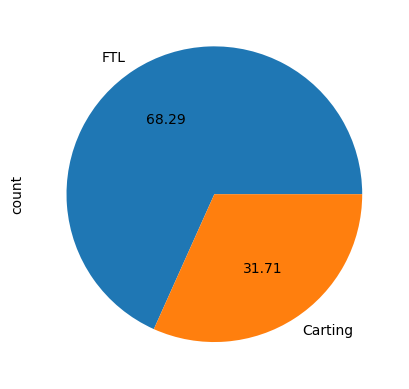

In [36]:
condensed_df['route_type'].value_counts().plot(kind='pie',autopct="%.2f")

<AxesSubplot:ylabel='data'>

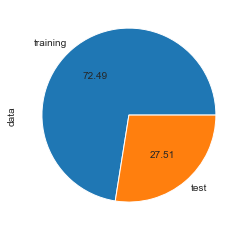

In [ ]:
condensed_df['data'].value_counts().plot(kind='pie',autopct="%.2f")

Before grouping the data by trip_uuid Route type FTL comprises 67.95% and Carting comprises 32.05% of the total orders .


In [ ]:
x_df = condensed_df.groupby("trip_uuid")[["data","route_type","source_code","destination_code","actual_time_y","osrm_time_y",
                                          "osrm_distance_y","source_state","destination_state","Trip_Day"]].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

x_df

trip_uuid      data route_type source_code  \
0      trip-153671041653548748  training        FTL         H_6   
1      trip-153671042288605164  training    Carting           D   
2      trip-153671043369099517  training        FTL          HB   
3      trip-153671066201138152  training    Carting         DPC   
4      trip-153671074033284934  training    Carting        D_12   
...                        ...       ...        ...         ...   
11875  trip-153861089872028474      test    Carting          DC   
11876  trip-153861095625827784      test    Carting           C   
11877  trip-153861104386292051      test    Carting         DPC   
11878  trip-153861106442901555      test    Carting          DC   
11879  trip-153861115439069069      test    Carting           D   

      destination_code  actual_time_y  osrm_time_y  osrm_distance_y  \
0                   HB         1562.0        717.0         991.3523   
1                    D          143.0         68.0          85.1110   
2                    H         3347.0       1740.0        2354.0665   
3                   Dc           24.0         13.0          12.0184   
4                  I_4          161.0         29.0          30.9359   
...                ...            ...          ...              ...   
11875               DC           62.0         28.0          38.2867   
11876                H           83.0         62.0          73.4630   
11877               DC           21.0         12.0          16.0882   
11878              H_6          282.0         48.0          58.9037   
11879                I          264.0        179.0         171.1103   

          source_state destination_state  Trip_Day  
0      (Uttar Pradesh)         (Haryana)        12  
1          (Karnataka)       (Karnataka)        12  
2            (Haryana)          (Punjab)        12  
3         (Tamil Nadu)      (Tamil Nadu)        12  
4            (Gujarat)         (Gujarat)        12  
...                ...               ...       ...  
11875     (Tamil Nadu)      (Tamil Nadu)         3  
11876     (Chandigarh)          (Punjab)         3  
11877        (Haryana)         (Haryana)         3  
11878  (Uttar Pradesh)   (Uttar Pradesh)         3  
11879     (Tamil Nadu)      (Tamil Nadu)         3  

[11880 rows x 11 columns]

In [ ]:
# Top 10 Cities with Highest number of trips
pd.set_option("display.max_rows", 1000)
y_df = condensed_df.groupby(["source_city","destination_city"])["actual_time_y"].count()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

y_df.sort_values(by=['actual_time_y'], ascending=False , inplace = True)
y_df.head(10)

source_city destination_city  actual_time_y
669     Gurgaon        Bangalore           4976
169   Bangalore          Gurgaon           3316
687     Gurgaon          Kolkata           2862
230   Bengaluru        Bengaluru           2062
163   Bangalore        Bengaluru           1741
684     Gurgaon        Hyderabad           1639
670     Gurgaon         Bhiwandi           1617
674     Gurgaon            Delhi           1345
282    Bhiwandi          Gurgaon           1269
228   Bengaluru        Bangalore           1268

Top cities that have more number of Trips are Bangalore, Gurgaon, Kolkata, Hyderabad, Bhiwandi, Delhi.

<AxesSubplot:ylabel='route_type'>

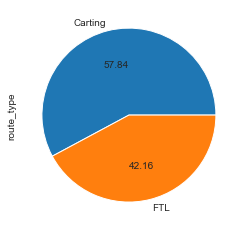

In [ ]:
x_df['route_type'].value_counts().plot(kind='pie',autopct="%.2f")

<AxesSubplot:ylabel='data'>

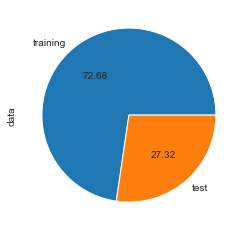

In [ ]:
x_df['data'].value_counts().plot(kind='pie',autopct="%.2f")

From the above difference between before and after grouping by trip_uuid we can infer that FTL type has more relay point although it is not making no other pickups or drop-offs along the way
Among the given data Training data comprises 72.49% and test data comprises 27.51%


<AxesSubplot:xlabel='source_code', ylabel='Count'>

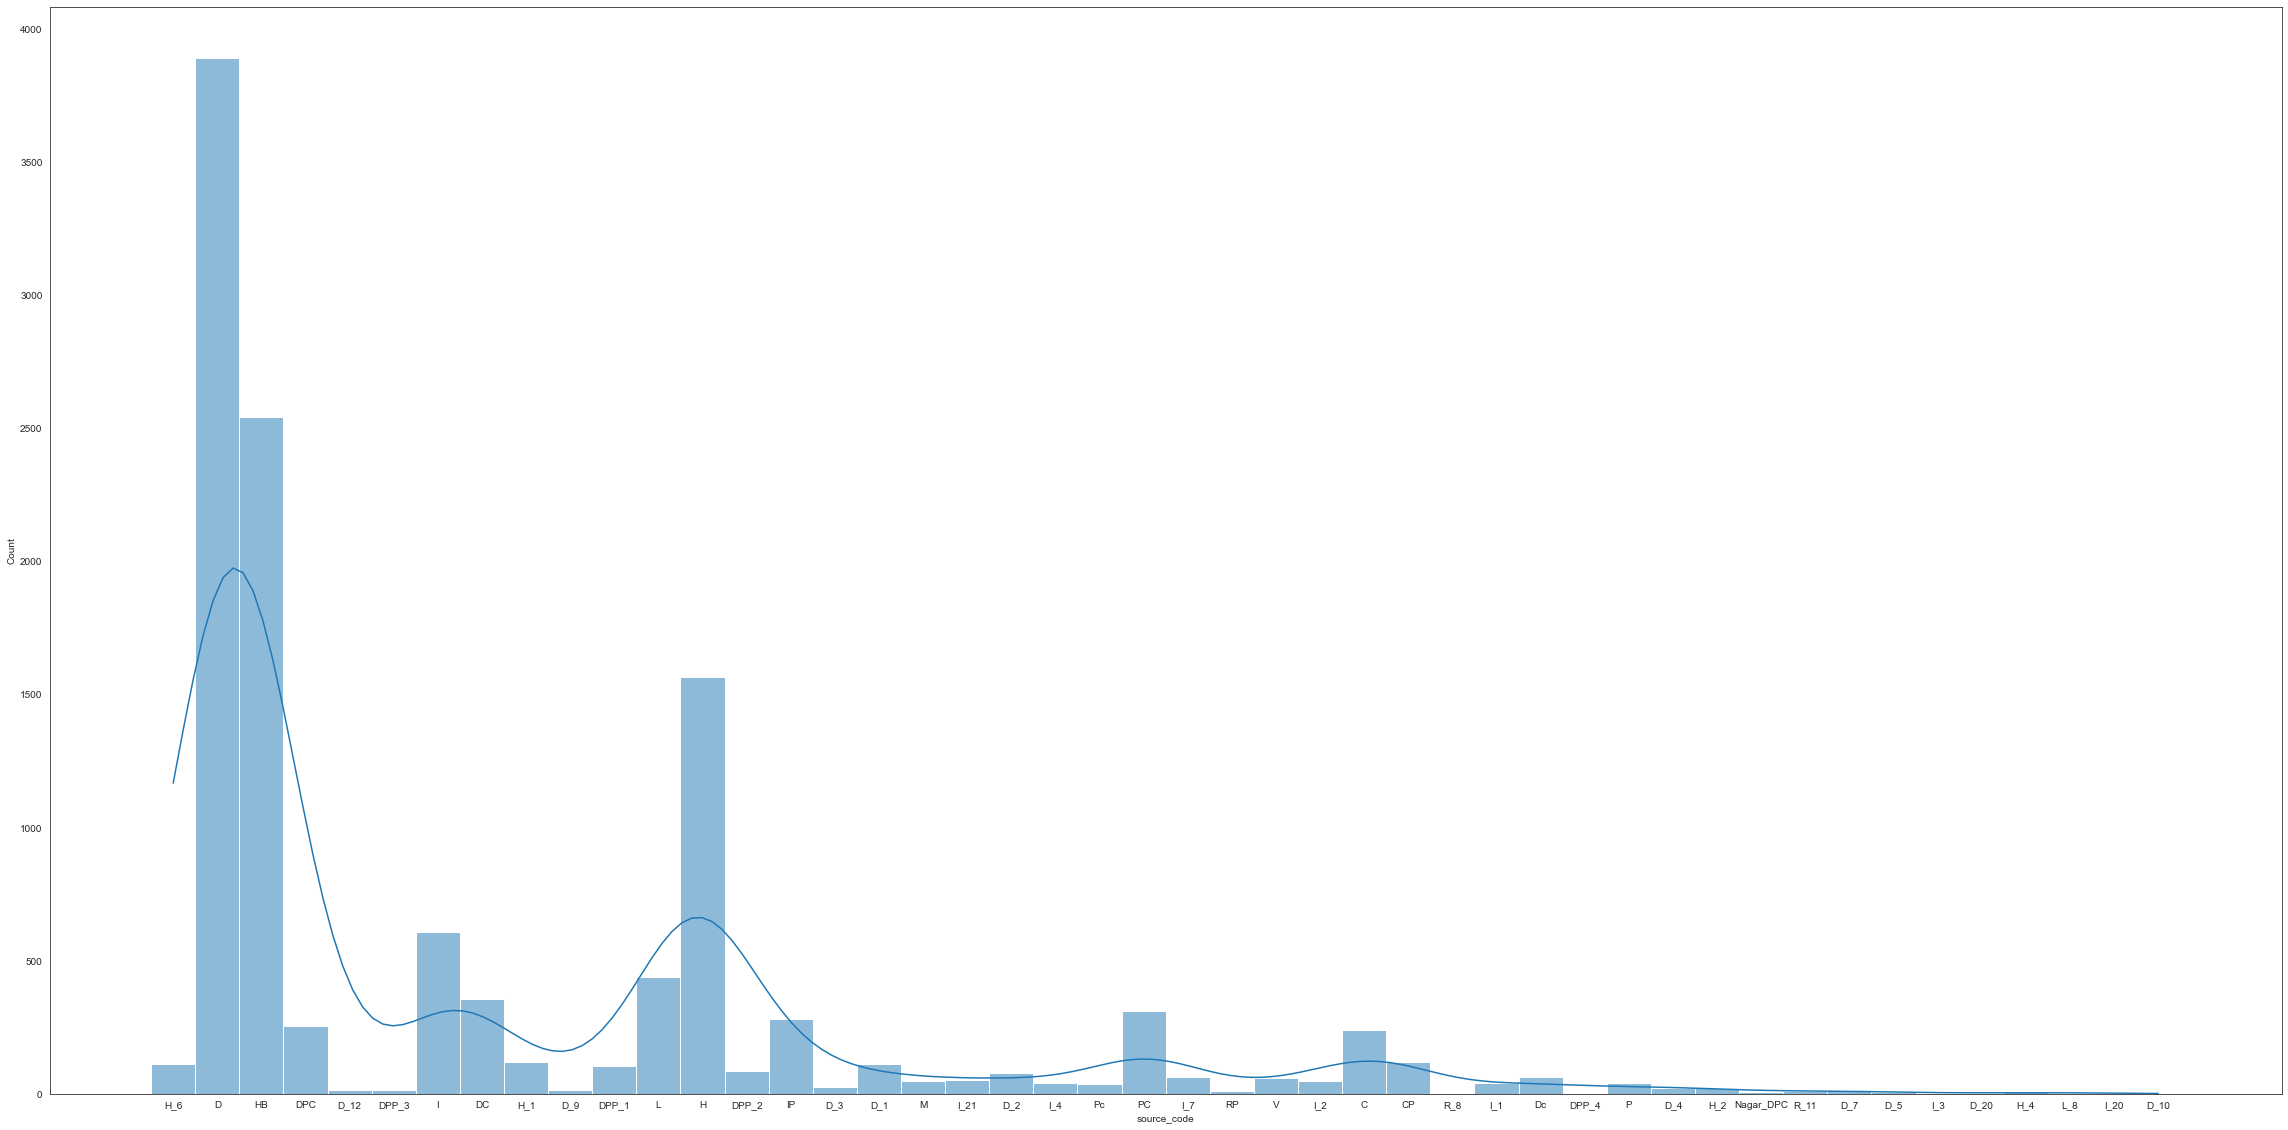

In [ ]:
### Quantative attributes in data are
### source_code,source_state,destination_code,destination_state,Trip_Day

fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='source_code', kde = True )

<AxesSubplot:xlabel='destination_code', ylabel='Count'>

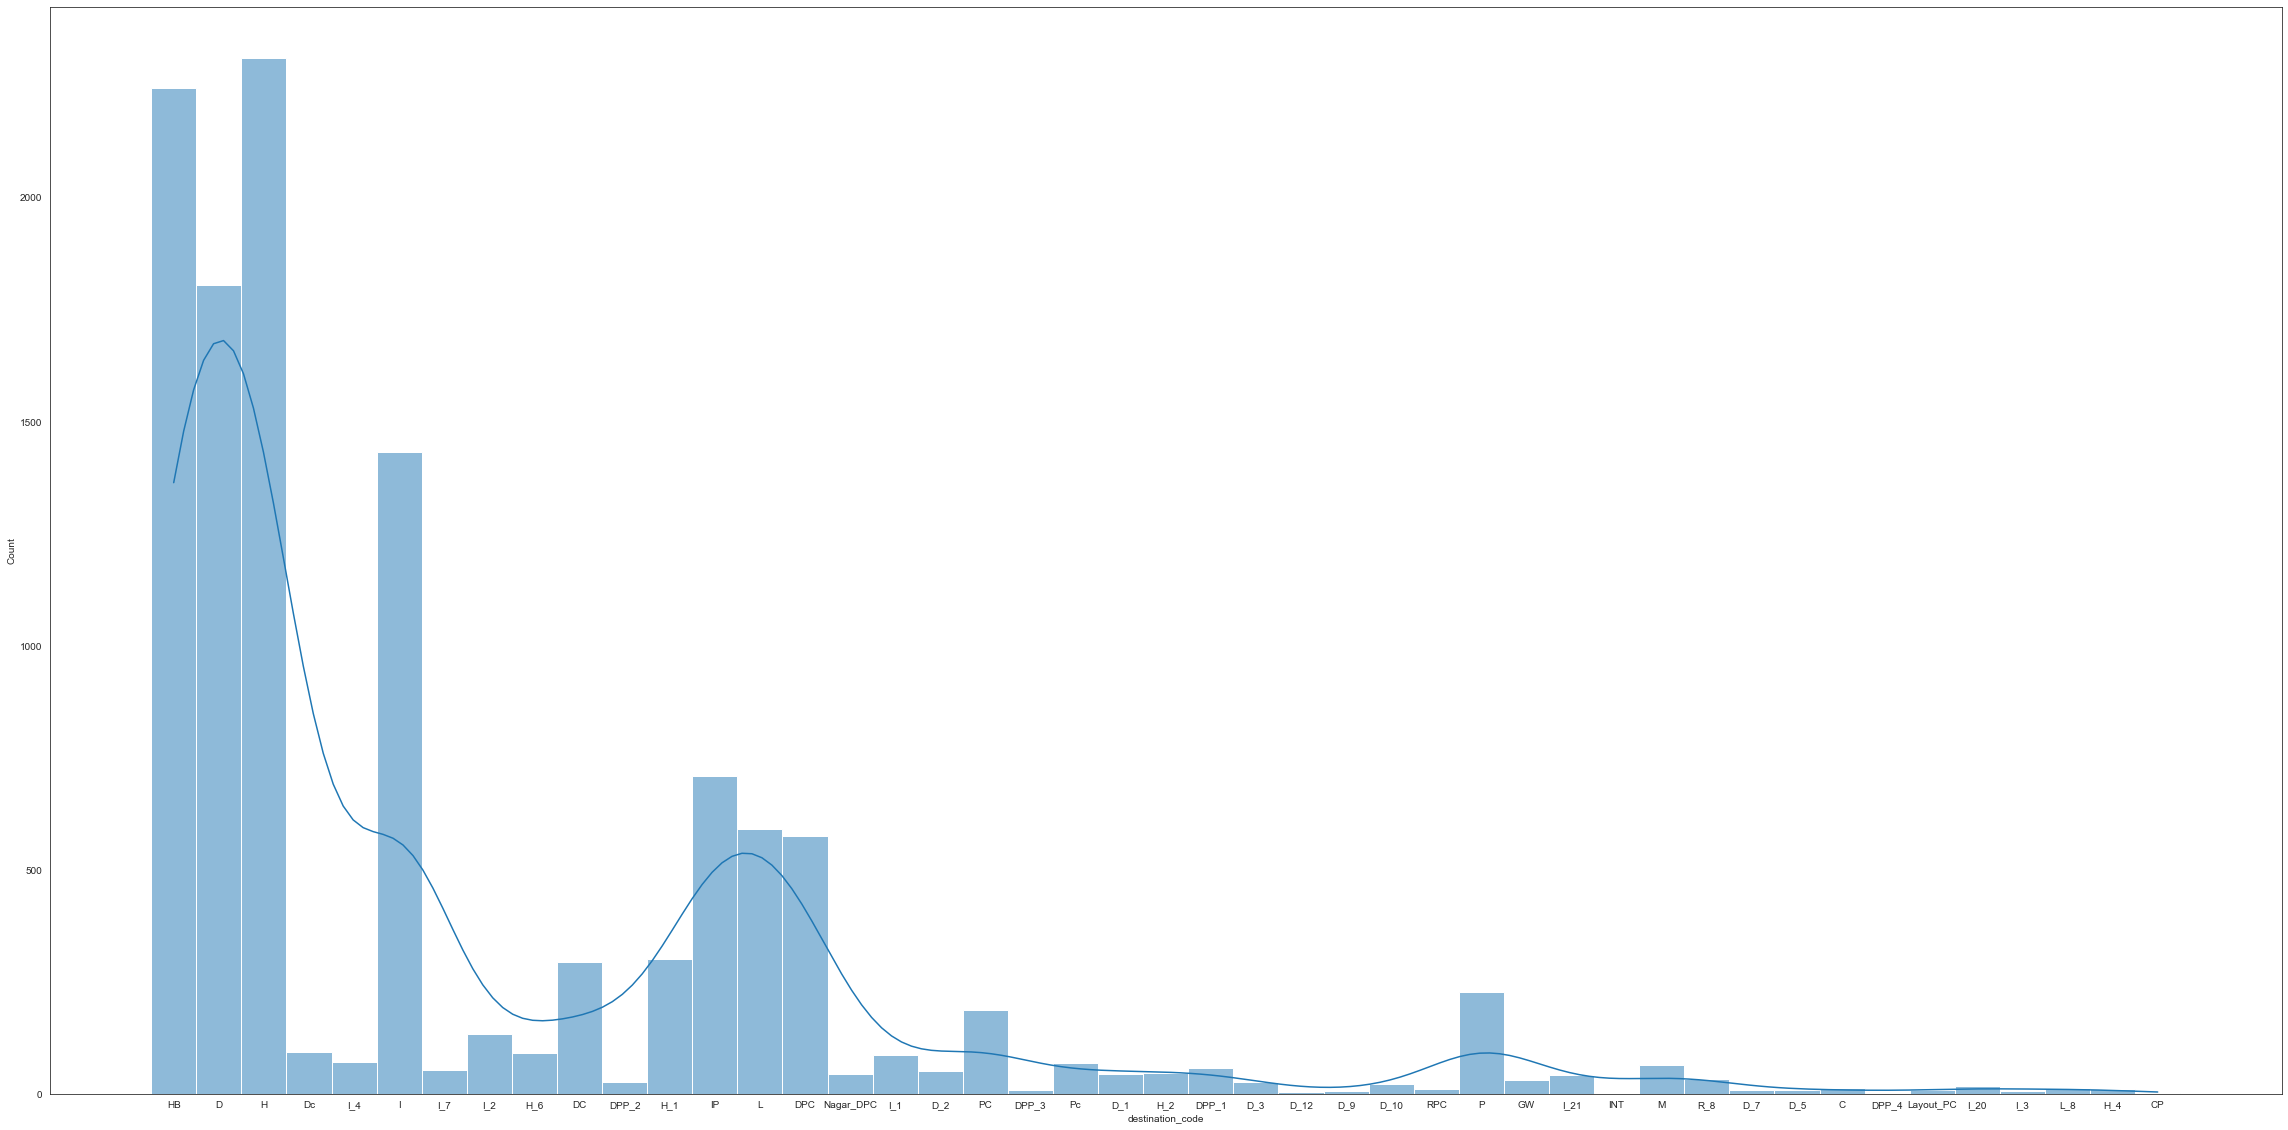

In [ ]:
fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='destination_code', kde = True )

<AxesSubplot:xlabel='source_state', ylabel='Count'>

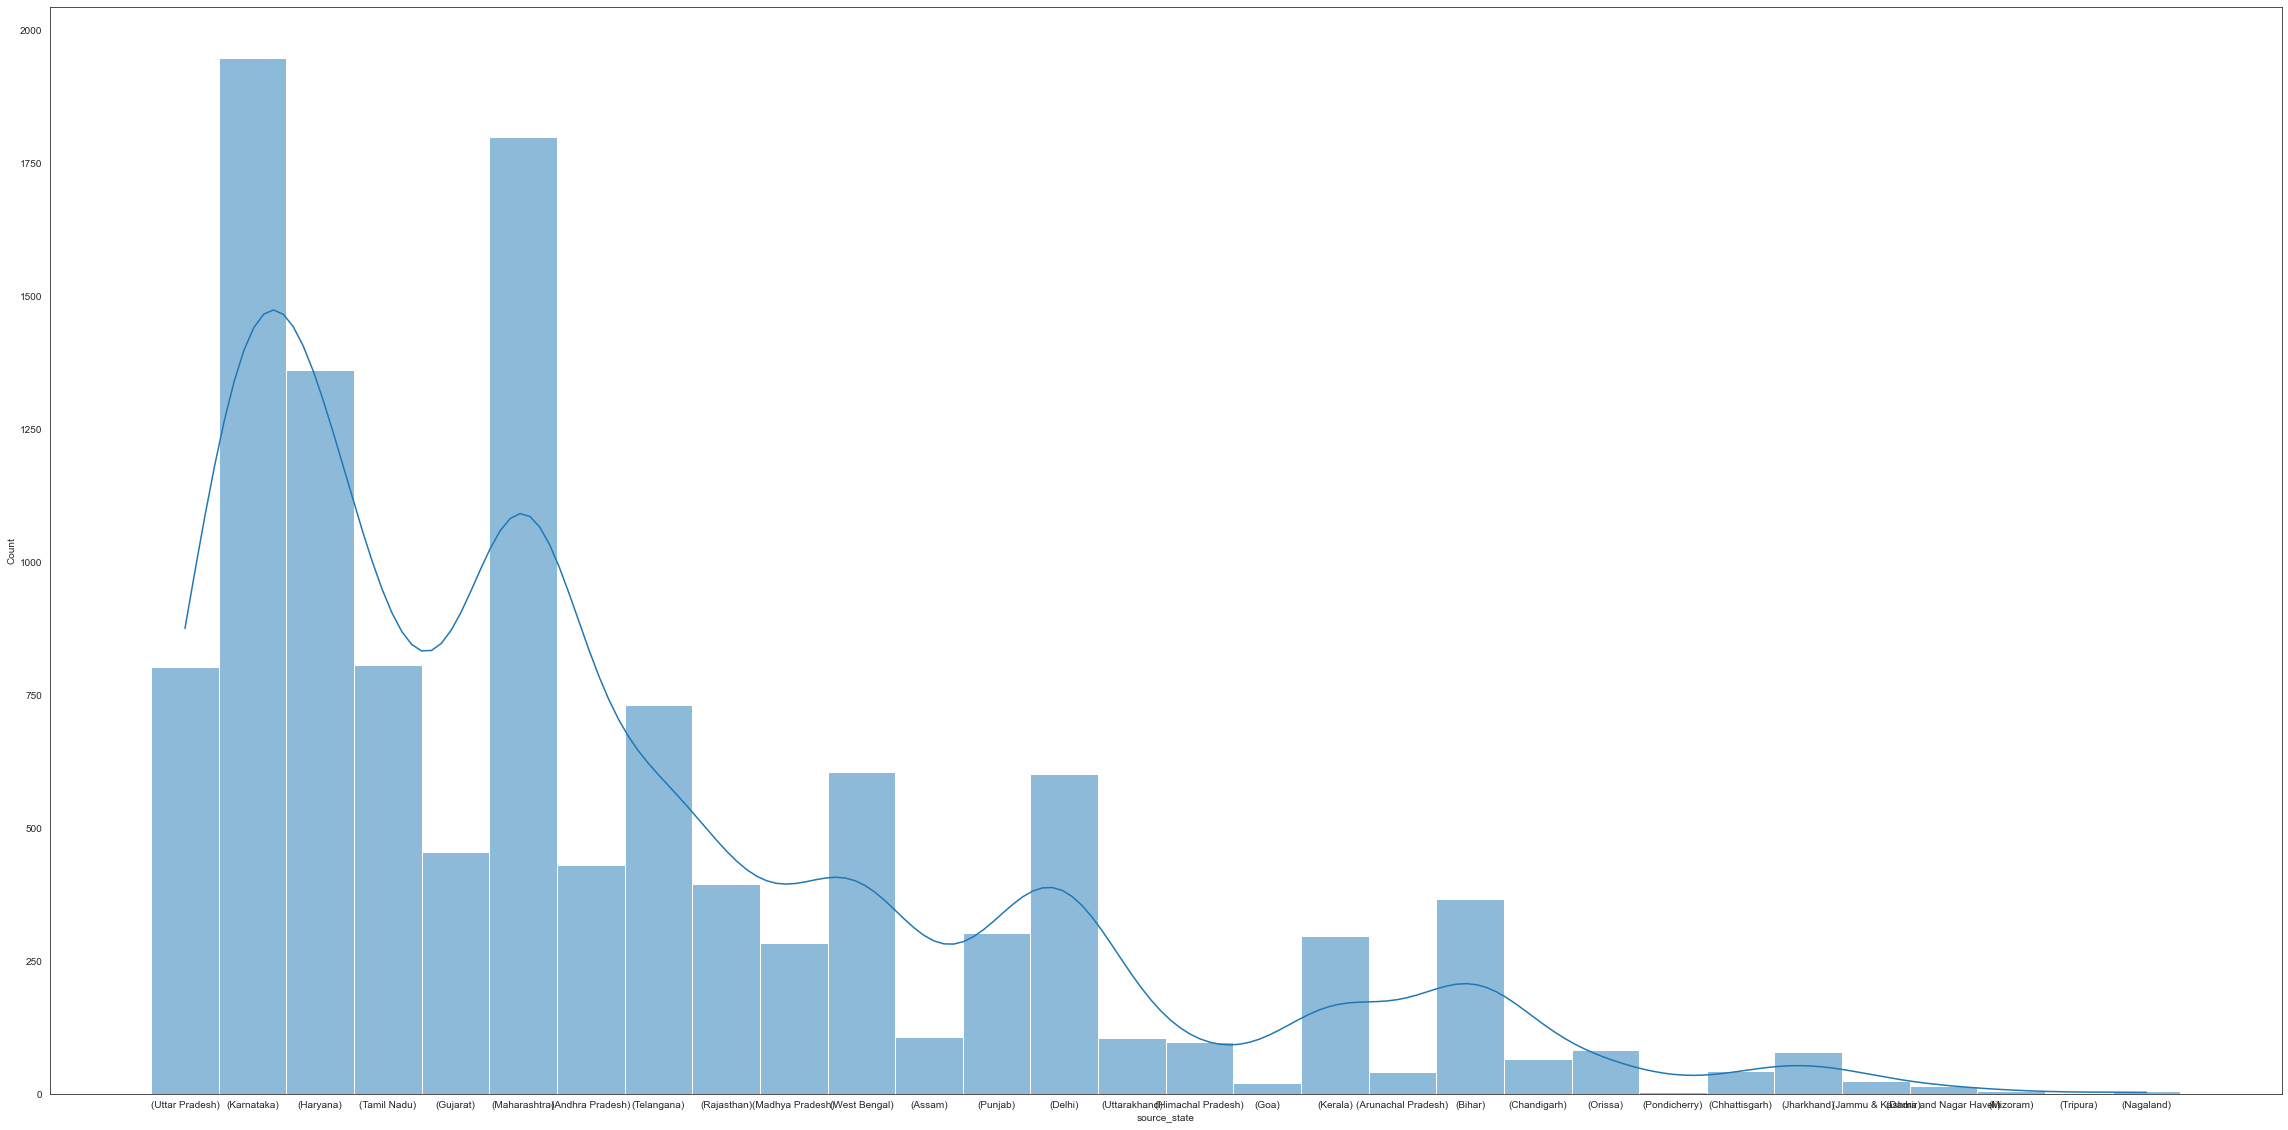

In [ ]:
fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='source_state', kde = True )

<AxesSubplot:xlabel='destination_state', ylabel='Count'>

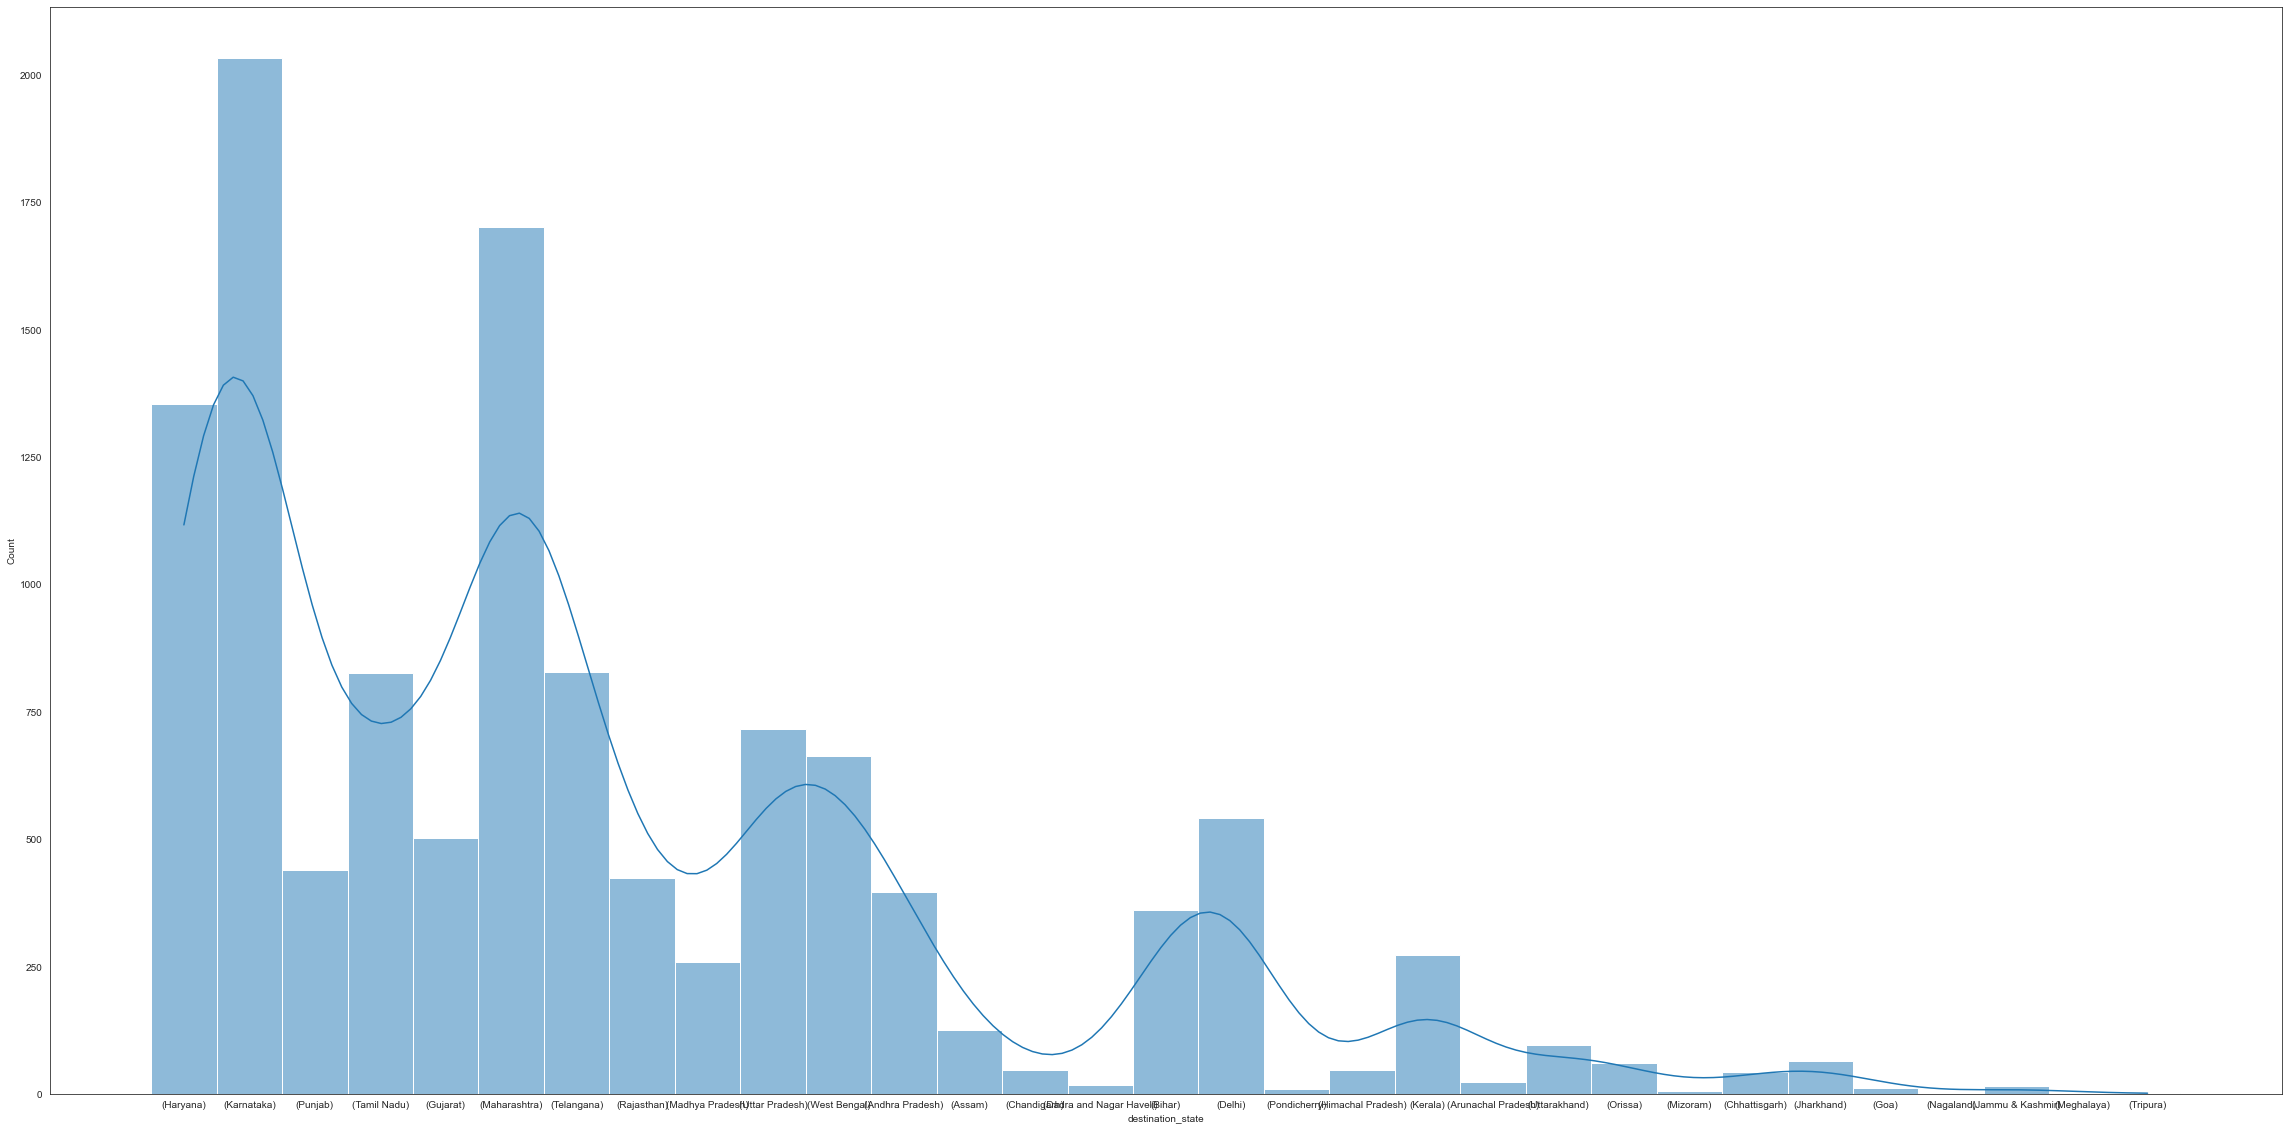

In [ ]:
fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='destination_state', kde = True )

<AxesSubplot:xlabel='Trip_Day', ylabel='Count'>

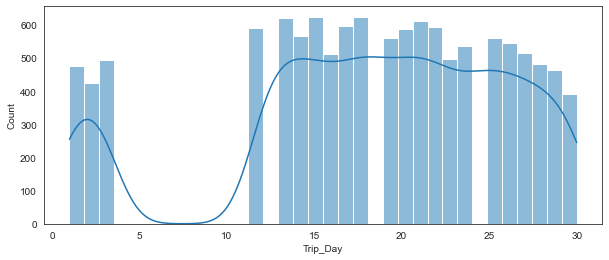

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 4))


sns.histplot(data =x_df , x ='Trip_Day', kde = True )

The most number of trips are from source code “D” & “HB”
The most number of trips are to destination code “D” , “HB”,”H” & ”I”
The most number of trips are from source state “Karnataka” , “Maharashtra”, “Haryana”
The most number of trips are to Destination state “Karnataka” , “Maharashtra”, “Haryana”
We can see that there is a slight decline in number of trips at the end of month


In [ ]:
print("Number of states the pacakages are being received from : ",x_df.source_state.nunique())
print("Number of states the pacakages are being received from : ",x_df.destination_state.nunique())

Number of states the pacakages are being received from :  30
Number of states the pacakages are being received from :  31


<AxesSubplot:xlabel='count', ylabel='source_state'>

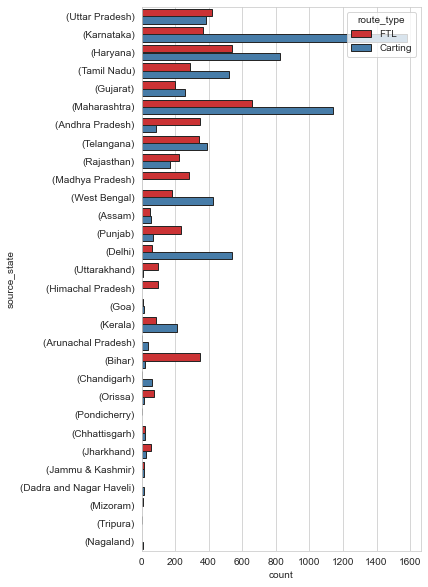

In [ ]:
sns.set_style("whitegrid")

fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='source_state',  hue = "route_type",edgecolor="0.15", palette='Set1')

<AxesSubplot:xlabel='count', ylabel='destination_state'>

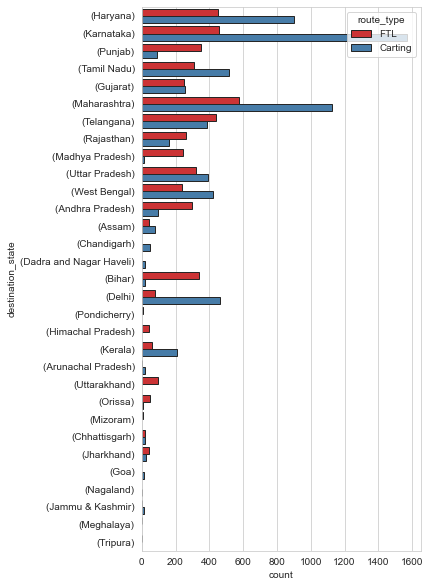

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='destination_state',  hue = "route_type",edgecolor="0.15", palette='Set1')

<AxesSubplot:xlabel='count', ylabel='source_code'>

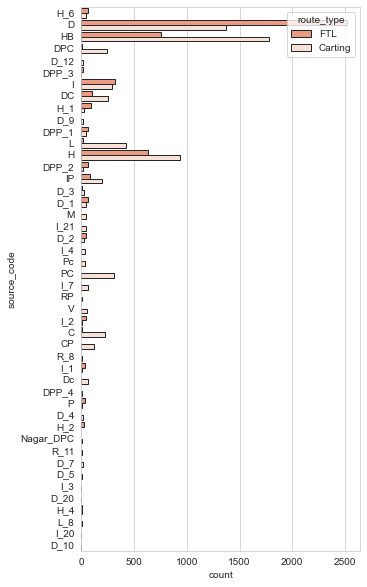

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='source_code',  hue = "route_type",edgecolor="0.15", palette=["#fc9272","#fee0d2"])

<AxesSubplot:xlabel='count', ylabel='destination_code'>

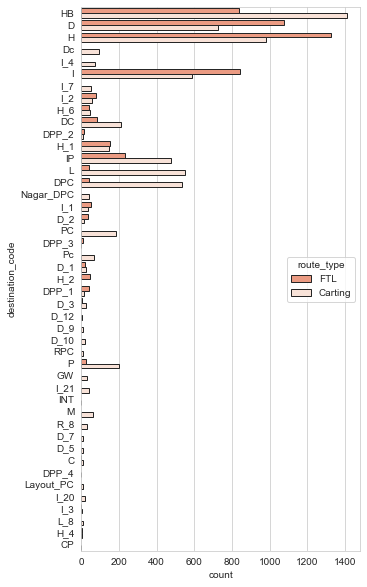

In [ ]:
fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='destination_code',  hue = "route_type",edgecolor="0.15", palette=["#fc9272","#fee0d2"])

Although Karnataka has the highest number of trips from Source district still the majority of those trips come under non-dominant route-type i,e Carting , whereas Maharashtra has highest FTL type trips still which is dominated by Carting .
Insights that are observed in trips from source district resemble the insights observed in trips to destination district
Source codes D and HB are quiet opposite when it comes to dominance of FTL and carting, D has more number of FTL’s whereas HB has more number of Carting’s
In Destination codes D , HB are same as source codes and H , I codes have FTL in dominance
By comparing source code and destination code we can understand that these codes are again divided internally as sub-codes .


<AxesSubplot:xlabel='actual_time_y', ylabel='route_type'>

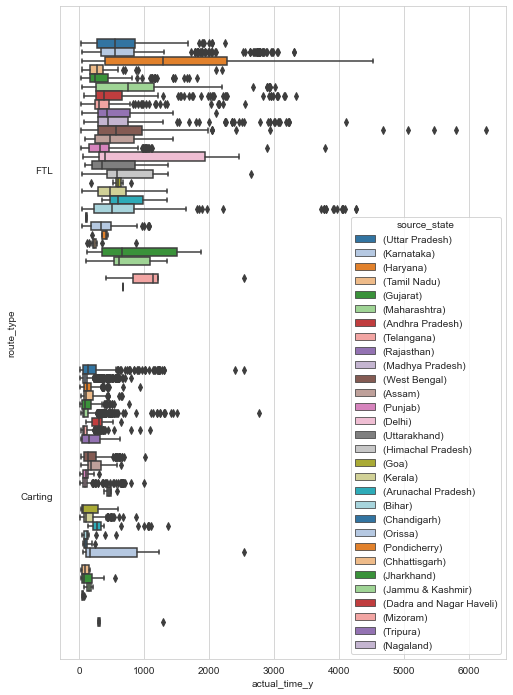

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='source_state', palette=custom_palette)


<AxesSubplot:xlabel='actual_time_y', ylabel='route_type'>

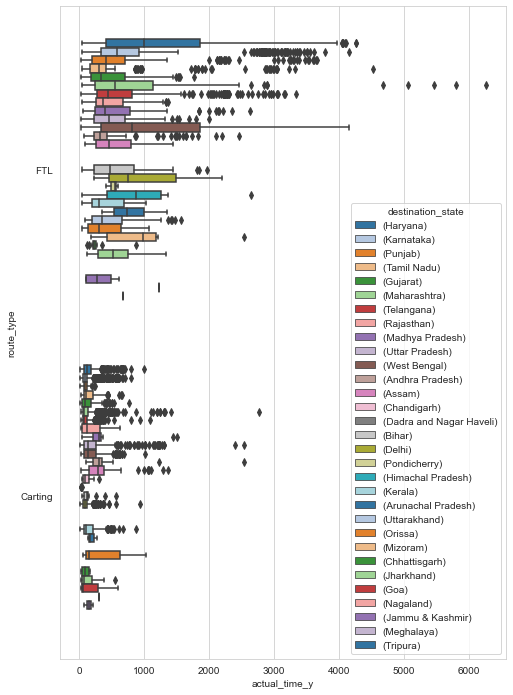

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='destination_state', palette=custom_palette)


<AxesSubplot:xlabel='actual_time_y', ylabel='route_type'>

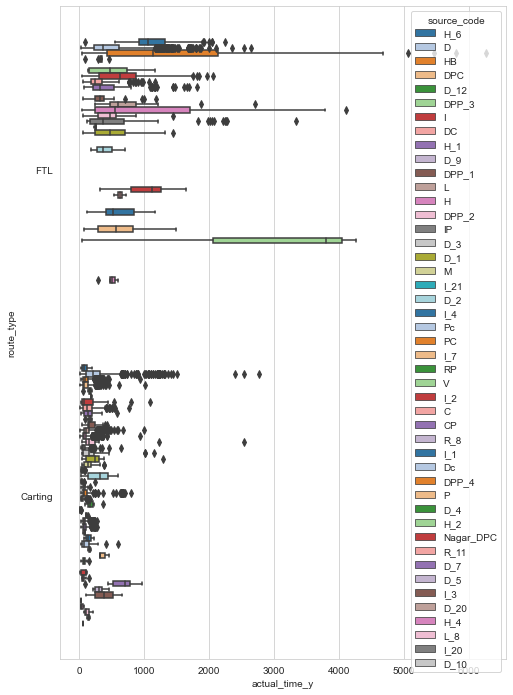

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='source_code', palette=custom_palette)


<AxesSubplot:xlabel='actual_time_y', ylabel='route_type'>

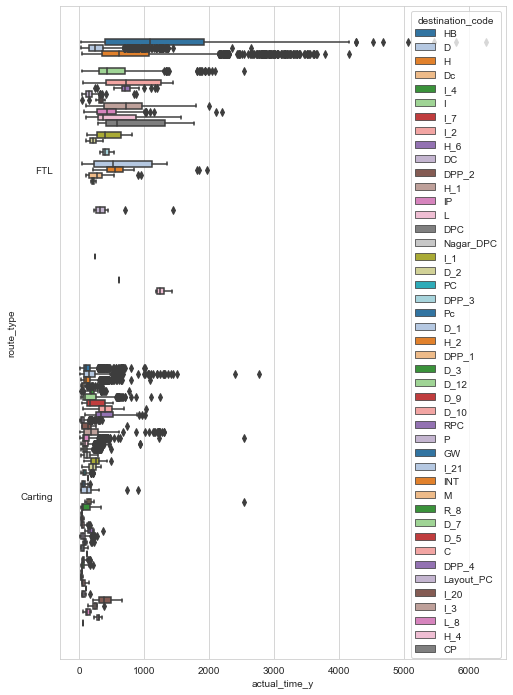

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='destination_code', palette=custom_palette)


Haryana doesn't have any outliers even though it has one of the highest number of trips  from source district
West Bengal took the highest number of minutes to complete the trip from source district by which we can also conclude West bengal also has the most number of far away destinations
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .
In Destination district West bengal doesn't have any outliers
Maharashtra took the highest number of minutes to complete the trip to destination district by which we can also conclude Maharashtra receives  from most number of far away source districts
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .
Source code HB has the highest number of minutes to complete the trip by which we can also conclude HB  also has the most number of far away destinations
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .
Destination code HB has the highest number of minutes to complete the trip by which we can also conclude HB  receives  from most number of far away source districts
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .


<AxesSubplot:xlabel='osrm_time_y', ylabel='osrm_distance_y'>

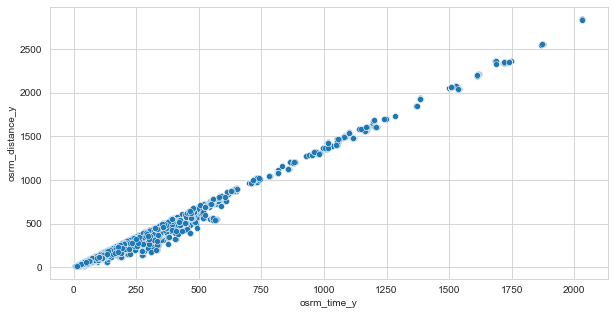

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 5))


sns.scatterplot(data =x_df , x ='osrm_time_y', y = 'osrm_distance_y' )

From the scatter plot of osrm_time, osrm_distance (Aggregate values ) we can see the trend is linear as the distance increases time increases

<AxesSubplot:>

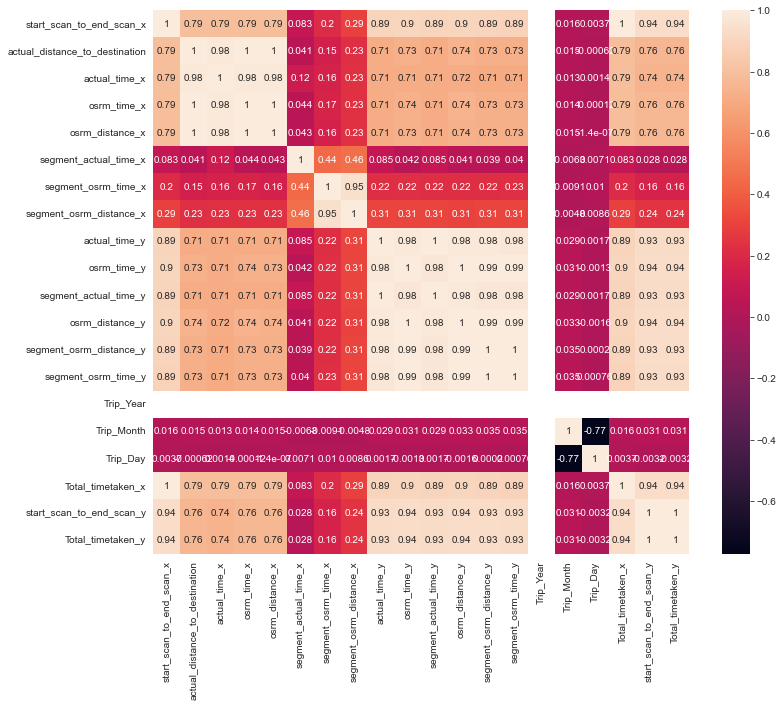

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12, 10))


sns.heatmap(condensed_df.corr(),annot=True)

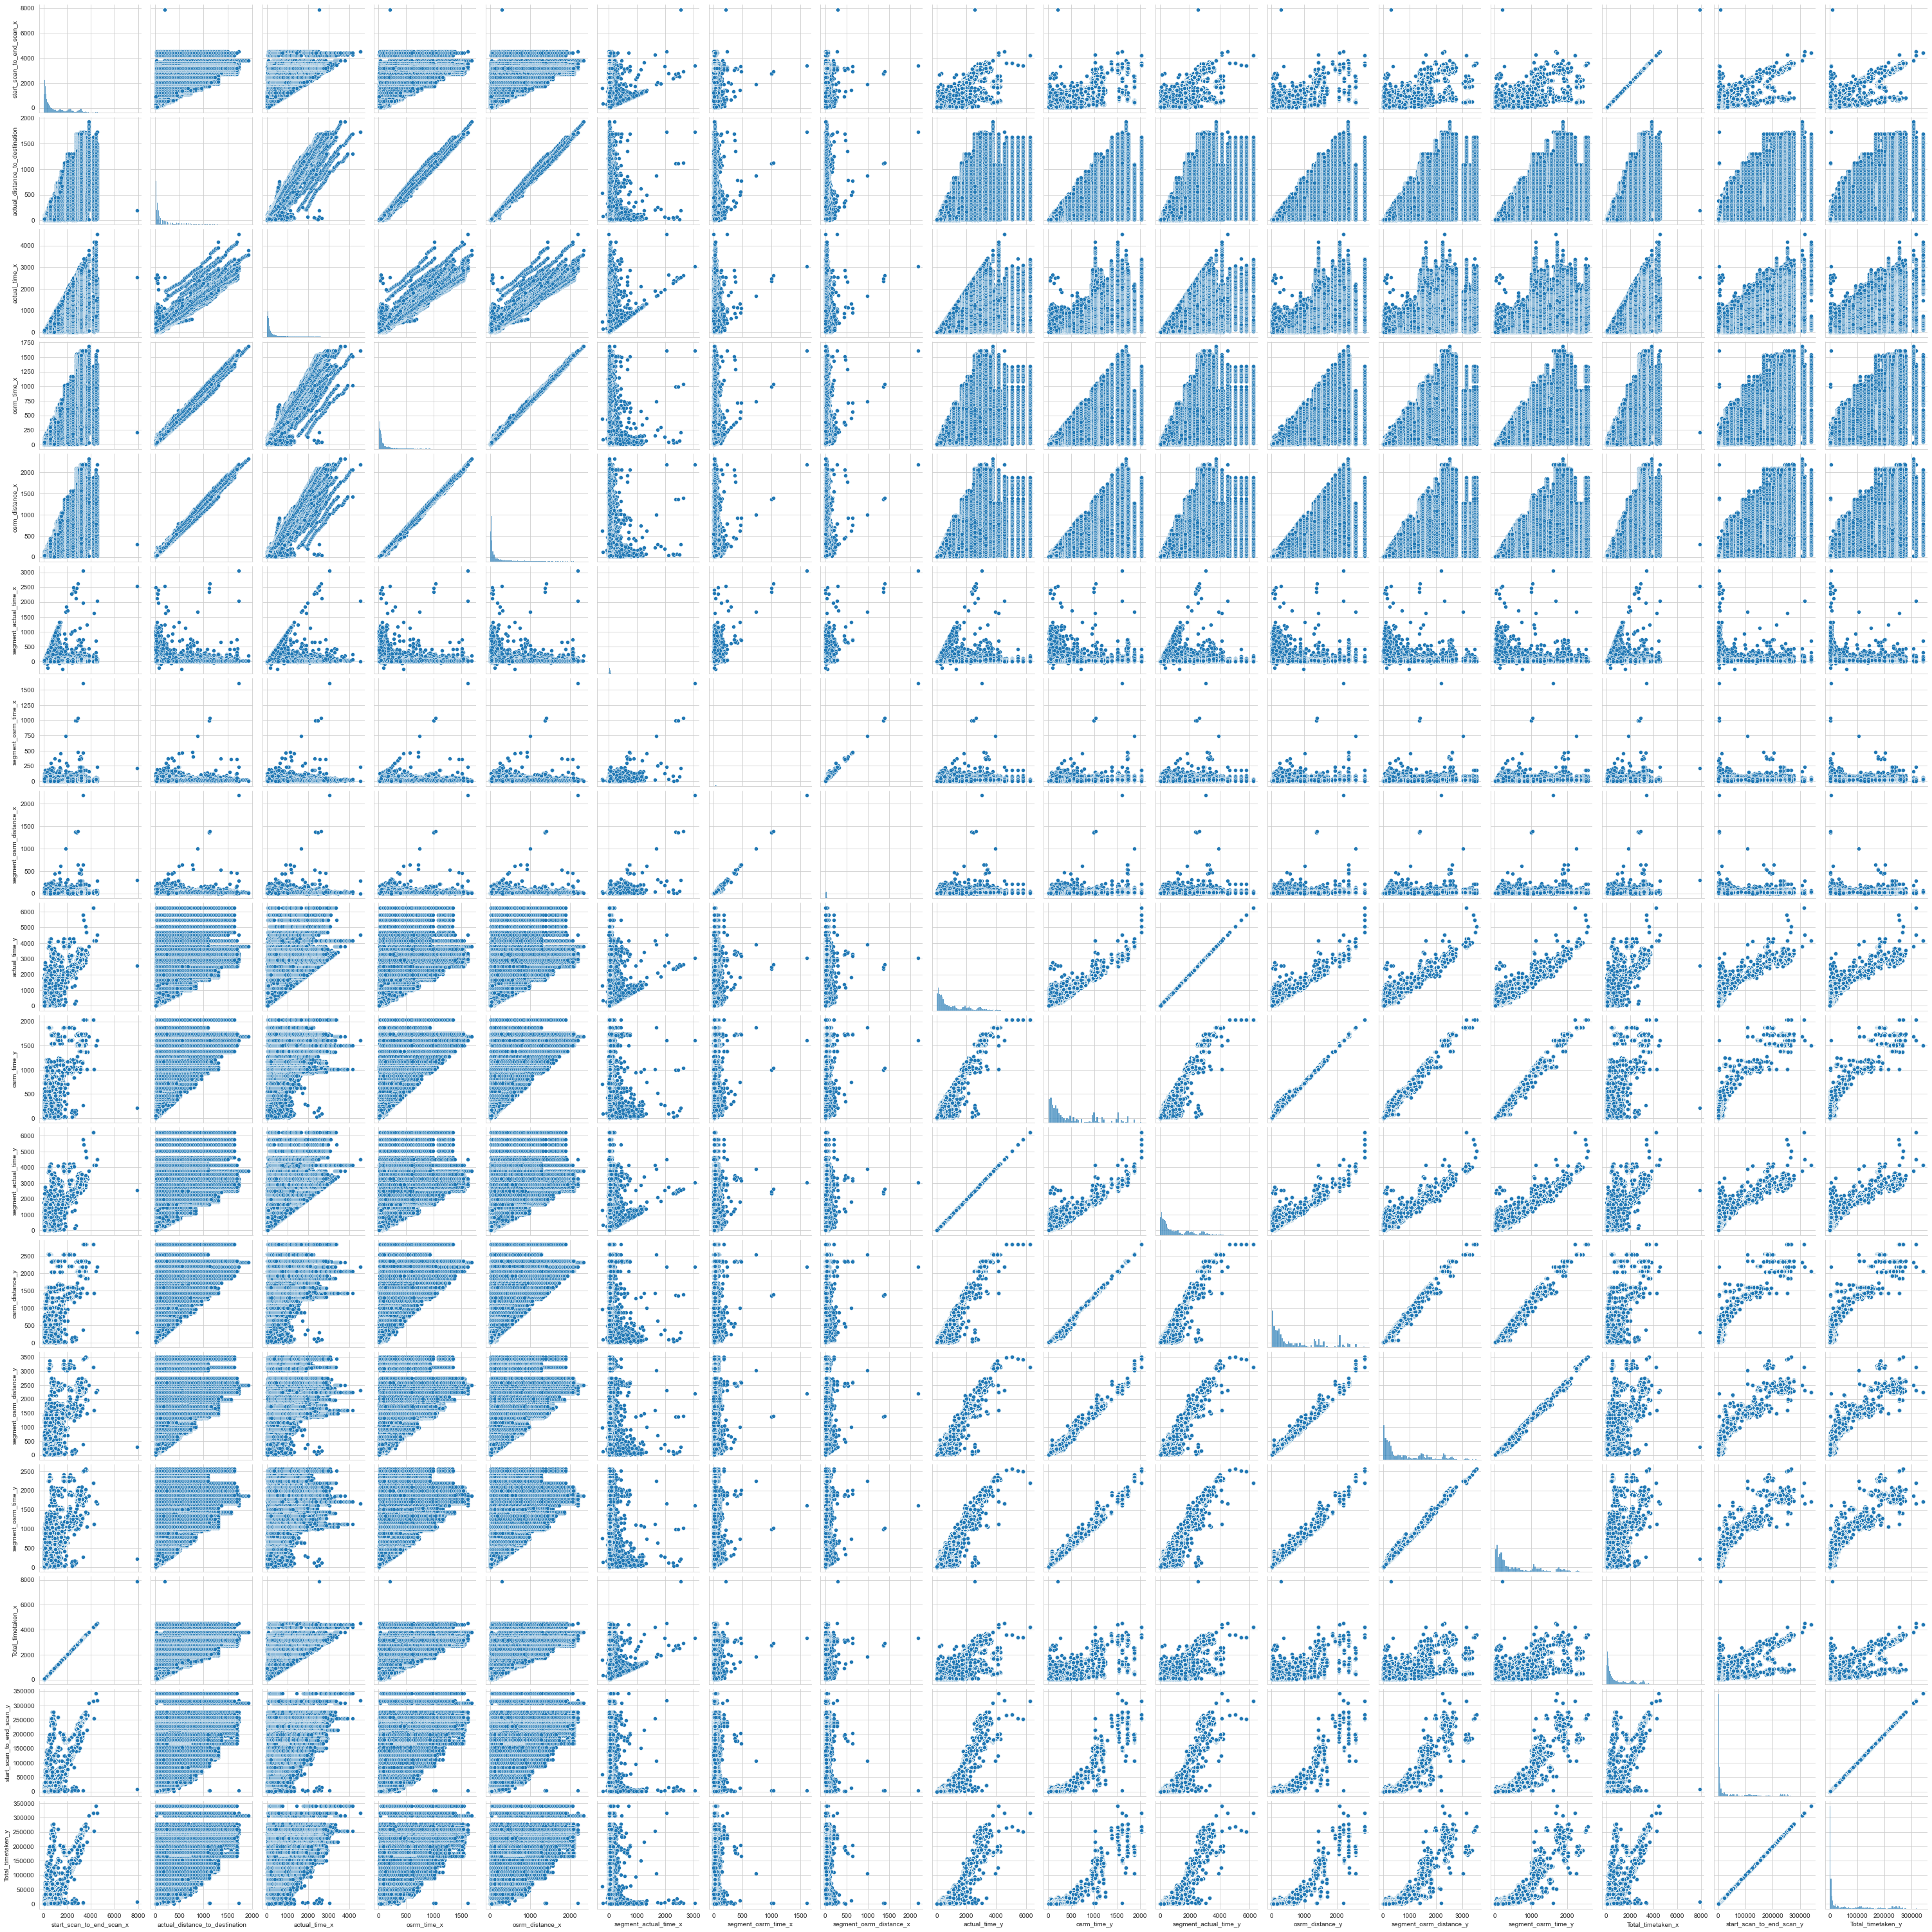

In [ ]:
sns.pairplot(condensed_df.select_dtypes(include='float64'))

In [ ]:
condensed_df

data         trip_creation_time route_type  \
0       training 2018-09-12 00:00:16.535741        FTL   
1       training 2018-09-12 00:00:16.535741        FTL   
2       training 2018-09-12 00:00:16.535741        FTL   
3       training 2018-09-12 00:00:16.535741        FTL   
4       training 2018-09-12 00:00:16.535741        FTL   
...          ...                        ...        ...   
115530      test 2018-10-03 23:59:14.390954    Carting   
115531      test 2018-10-03 23:59:14.390954    Carting   
115532      test 2018-10-03 23:59:14.390954    Carting   
115533      test 2018-10-03 23:59:14.390954    Carting   
115534      test 2018-10-03 23:59:14.390954    Carting   

                      trip_uuid  start_scan_to_end_scan_x  \
0       trip-153671041653548748                     999.0   
1       trip-153671041653548748                     999.0   
2       trip-153671041653548748                     999.0   
3       trip-153671041653548748                     999.0   
4       trip-153671041653548748                     999.0   
...                         ...                       ...   
115530  trip-153861115439069069                      45.0   
115531  trip-153861115439069069                      91.0   
115532  trip-153861115439069069                      91.0   
115533  trip-153861115439069069                      91.0   
115534  trip-153861115439069069                      91.0   

        actual_distance_to_destination  actual_time_x  osrm_time_x  \
0                            22.812439           43.0         39.0   
1                            45.902553           69.0         35.0   
2                            68.090371          146.0         51.0   
3                            88.382207          181.0         66.0   
4                           110.168313          205.0         82.0   
...                                ...            ...          ...   
115530                       17.373209           33.0         31.0   
115531                        9.393822           15.0         13.0   
115532                       18.942420           30.0         20.0   
115533                       28.039689           38.0         27.0   
115534                       33.673835           90.0         48.0   

        osrm_distance_x  segment_actual_time_x  ...  destination_city  \
0               55.2597                   43.0  ...            Kanpur   
1               49.4845                   25.0  ...            Kanpur   
2               72.5479                   76.0  ...            Kanpur   
3               93.9641                   35.0  ...            Kanpur   
4              117.2332                   23.0  ...            Kanpur   
...                 ...                    ...  ...               ...   
115530          25.7087                   15.0  ...          Peikulam   
115531          14.7197                   15.0  ...       Tirunelveli   
115532          23.4582                   15.0  ...       Tirunelveli   
115533          33.0696                    8.0  ...       Tirunelveli   
115534          40.6080                   51.0  ...       Tirunelveli   

        destination_place  destination_code  destination_state  Trip_Year  \
0                 Central               H_6    (Uttar Pradesh)       2018   
1                 Central               H_6    (Uttar Pradesh)       2018   
2                 Central               H_6    (Uttar Pradesh)       2018   
3                 Central               H_6    (Uttar Pradesh)       2018   
4                 Central               H_6    (Uttar Pradesh)       2018   
...                   ...               ...                ...        ...   
115530          SriVnktpm                 D       (Tamil Nadu)       2018   
115531           VdkkuSrt                 I       (Tamil Nadu)       2018   
115532           VdkkuSrt                 I       (Tamil Nadu)       2018   
115533           VdkkuSrt                 I       (Tamil Nadu)       2018   
115534           

<AxesSubplot:xlabel='Total_timetaken_y'>

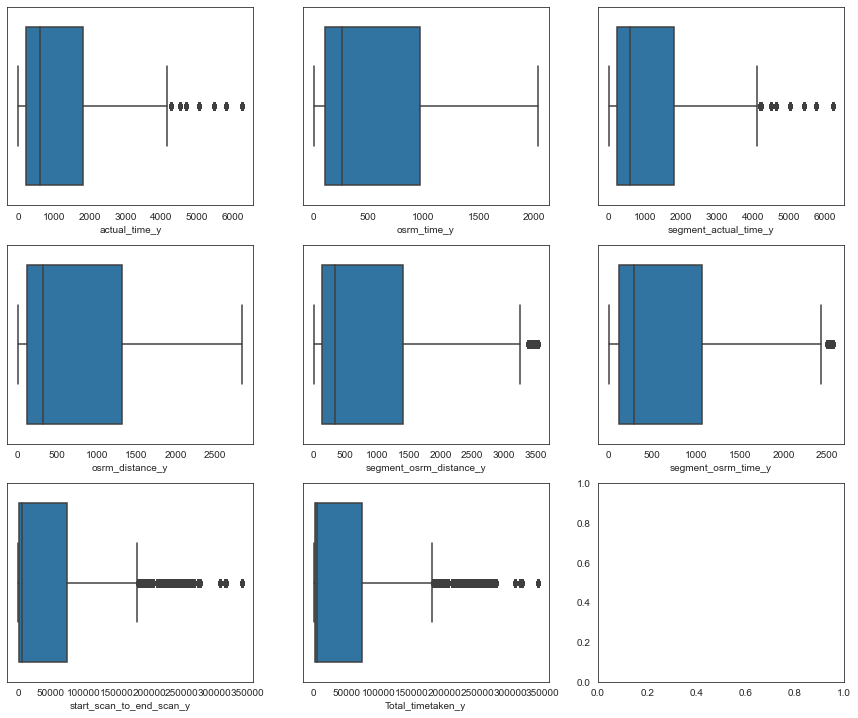

In [ ]:
sns.set_style("white")

fig , axis = plt.subplots(nrows = 3 , ncols = 3 , figsize = (15,5))

fig.subplots_adjust(top=2)


sns.boxplot(data =condensed_df , x ='actual_time_y',  ax =axis[0,0])
sns.boxplot(data =condensed_df , x ='osrm_time_y',  ax =axis[0,1])
sns.boxplot(data =condensed_df , x ='segment_actual_time_y',  ax =axis[0,2])
sns.boxplot(data =condensed_df , x ='osrm_distance_y',  ax =axis[1,0])
sns.boxplot(data =condensed_df , x ='segment_osrm_distance_y',  ax =axis[1,1])
sns.boxplot(data =condensed_df , x ='segment_osrm_time_y',  ax =axis[1,2])
sns.boxplot(data =condensed_df , x ='start_scan_to_end_scan_y',  ax =axis[2,0])
sns.boxplot(data =condensed_df , x ='Total_timetaken_y',  ax =axis[2,1])

trend is linear as the distance increases time increases
Outliers are found in Columns actual_time_y, segment_actual_time_y, segment_osrm_distance_y, segment_osrm_time_y, start_scan_to_end_scan_y,  Total_timetaken_y.
NOTE : the letter “_y” after each Column name represents its Aggregated data .


In [ ]:
# Outlier treatment

cols_with_outliers = ['actual_time_y','segment_actual_time_y','segment_osrm_distance_y','segment_osrm_time_y',
                      'start_scan_to_end_scan_y','Total_timetaken_y']

for col in cols_with_outliers:
    Q1 = condensed_df[col].quantile(0.25)
    Q3 = condensed_df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    condensed_df[col] = np.where(condensed_df[col] > upper, upper, condensed_df[col])

<AxesSubplot:xlabel='Total_timetaken_y'>

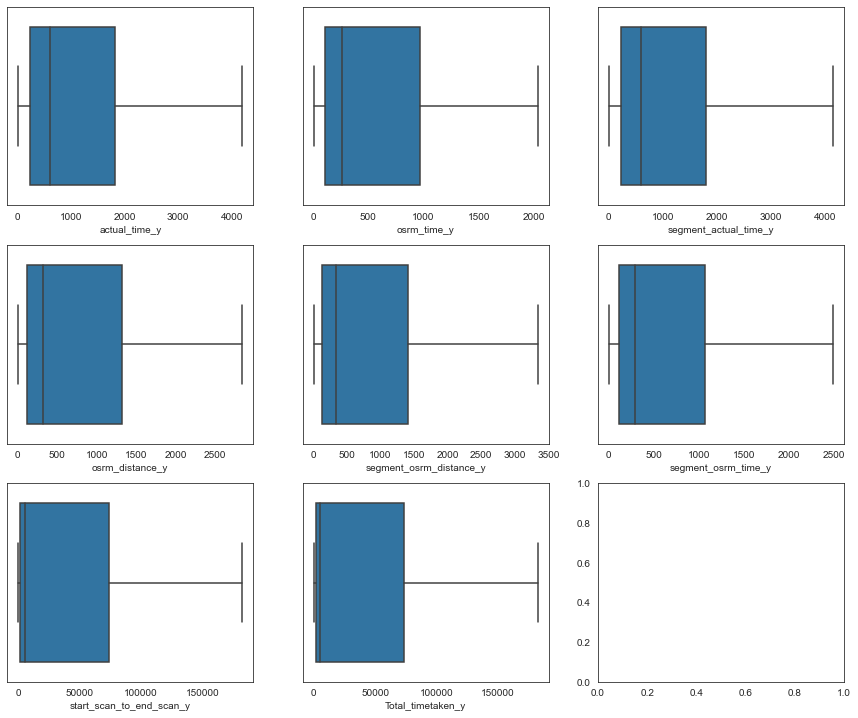

In [ ]:
sns.set_style("white")

fig , axis = plt.subplots(nrows = 3 , ncols = 3 , figsize = (15,5))

fig.subplots_adjust(top=2)


sns.boxplot(data =condensed_df , x ='actual_time_y',  ax =axis[0,0])
sns.boxplot(data =condensed_df , x ='osrm_time_y',  ax =axis[0,1])
sns.boxplot(data =condensed_df , x ='segment_actual_time_y',  ax =axis[0,2])
sns.boxplot(data =condensed_df , x ='osrm_distance_y',  ax =axis[1,0])
sns.boxplot(data =condensed_df , x ='segment_osrm_distance_y',  ax =axis[1,1])
sns.boxplot(data =condensed_df , x ='segment_osrm_time_y',  ax =axis[1,2])
sns.boxplot(data =condensed_df , x ='start_scan_to_end_scan_y',  ax =axis[2,0])
sns.boxplot(data =condensed_df , x ='Total_timetaken_y',  ax =axis[2,1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

condensed_df.route_type = label_encoder.fit_transform(condensed_df.route_type)
condensed_df.route_type.value_counts()

1    78506
0    37029
Name: route_type, dtype: int64

<AxesSubplot:xlabel='Total_timetaken_y', ylabel='Density'>

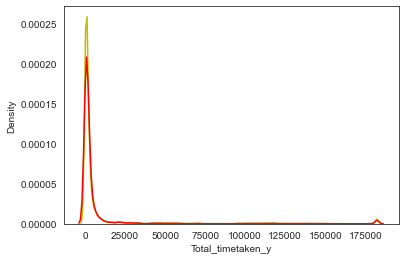

In [ ]:
### Comparing Total_timetaken & start_scan_to_end_scan

x_df = condensed_df.groupby("trip_uuid")['Total_timetaken_y'].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

y_df = condensed_df.groupby("trip_uuid")['start_scan_to_end_scan_y'].last()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

sns.kdeplot(x_df.Total_timetaken_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.start_scan_to_end_scan_y,bw_adjust=0.3,color = "r")


<AxesSubplot:xlabel='Total_timetaken_y', ylabel='Density'>

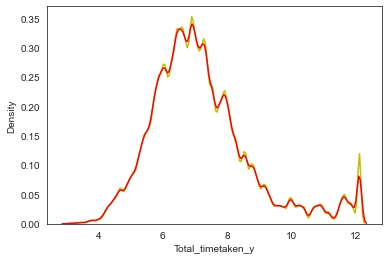

In [ ]:
#Normalizing the data using Log transformation
x_df.Total_timetaken_y = np.log(x_df.Total_timetaken_y)

y_df.start_scan_to_end_scan_y = np.log(y_df.start_scan_to_end_scan_y)


sns.kdeplot(x_df.Total_timetaken_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.start_scan_to_end_scan_y,bw_adjust=0.3,color = "r")

In [ ]:
# Hypothesis testing of Time taken to complete one whole trip
# H0 : Total_timetaken_y = start_scan_to_end_scan_y
# H1 : Total_timetaken_y != start_scan_to_end_scan_y

from scipy.stats import ttest_ind


T_statistic , p = ttest_ind(x_df.Total_timetaken_y,y_df.start_scan_to_end_scan_y)

if p > 0.01 :
    print("H0 Null hypothesis rejected , there is significant difference between the two groups")
else :
    print("H1 failed to reject Null hypothesis , start_scan_to_end_scan = Total_timetaken")
print("")
print("T_statistic : ",T_statistic, " & ", "P-value : ", p )

H0 Null hypothesis rejected , there is significant difference between the two groups

T_statistic :  0.14574946442066897  &  P-value :  0.8841204077997561


<AxesSubplot:xlabel='actual_time_y', ylabel='Density'>

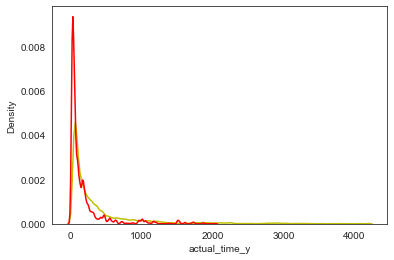

In [ ]:
### Comparing actual_time_y & osrm_time_y

x_df = condensed_df.groupby("trip_uuid")['actual_time_y'].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

y_df = condensed_df.groupby("trip_uuid")['osrm_time_y'].last()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

sns.kdeplot(x_df.actual_time_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.osrm_time_y,bw_adjust=0.3,color = "r")


<AxesSubplot:xlabel='actual_time_y', ylabel='Density'>

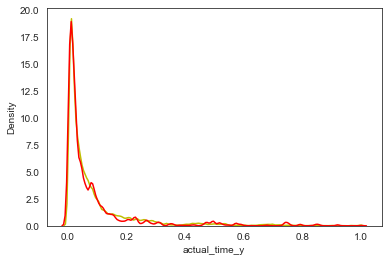

In [ ]:
#Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_df = scaler.fit_transform(x_df[["actual_time_y"]])
x_df = pd.DataFrame(x_df, columns=["actual_time_y"])

y_df = scaler.fit_transform(y_df[["osrm_time_y"]])
y_df = pd.DataFrame(y_df, columns=["osrm_time_y"])

sns.kdeplot(x_df.actual_time_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.osrm_time_y,bw_adjust=0.3,color = "r")

In [ ]:
# Hypothesis testing of Time taken to complete one whole trip
# H0 : actual_time = osrm_time
# H1 : actual_time != osrm_time

from scipy.stats import ttest_ind


T_statistic , p = ttest_ind(x_df.actual_time_y,y_df.osrm_time_y)

if p > 0.01 :
    print("H0 Null hypothesis rejected , there is significant difference between the two groups")
else :
    print("H1 failed to reject Null hypothesis , actual_time = osrm_time")
print("")
print("T_statistic : ",T_statistic, " & ", "P-value : ", p )

H1 failed to reject Null hypothesis , actual_time = osrm_time

T_statistic :  3.5837178063824946  &  P-value :  0.0003394158272098638


<AxesSubplot:xlabel='actual_time_y', ylabel='Density'>

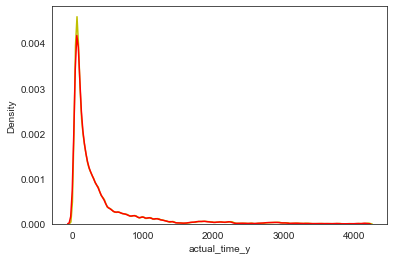

In [ ]:
### Comparing actual_time_y & segment_actual_time_y

x_df = condensed_df.groupby("trip_uuid")['actual_time_y'].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

y_df = condensed_df.groupby("trip_uuid")['segment_actual_time_y'].last()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

sns.kdeplot(x_df.actual_time_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.segment_actual_time_y,bw_adjust=0.3,color = "r")


<AxesSubplot:xlabel='actual_time_y', ylabel='Density'>

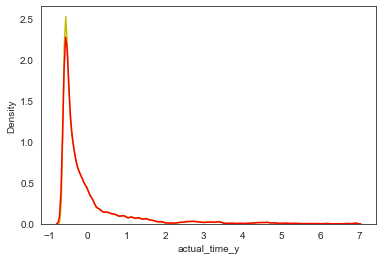

In [ ]:
#  Standardizing the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_df = scaler.fit_transform(x_df[["actual_time_y"]])
x_df = pd.DataFrame(x_df, columns=["actual_time_y"])

y_df = scaler.fit_transform(y_df[["segment_actual_time_y"]])
y_df = pd.DataFrame(y_df, columns=["segment_actual_time_y"])

sns.kdeplot(x_df.actual_time_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.segment_actual_time_y,bw_adjust=0.3,color = "r")

In [ ]:
# Hypothesis testing of Time taken to complete one whole trip
# H0 : actual_time = segment_actual_time_y
# H1 : actual_time > segment_actual_time_y

from scipy.stats import ttest_ind


T_statistic , p = ttest_ind(x_df.actual_time_y,y_df.segment_actual_time_y,alternative = "greater")

if p > 0.01 :
    print("H0 Null hypothesis rejected , there is significant difference between the two groups")
else :
    print("H1 failed to reject Null hypothesis , actual_time = segment_actual_time")
print("")
print("T_statistic : ",T_statistic, " & ", "P-value : ", p )

H0 Null hypothesis rejected , there is significant difference between the two groups

T_statistic :  1.6594004642163501e-15  &  P-value :  0.49999999999999933


<AxesSubplot:xlabel='osrm_distance_y', ylabel='Density'>

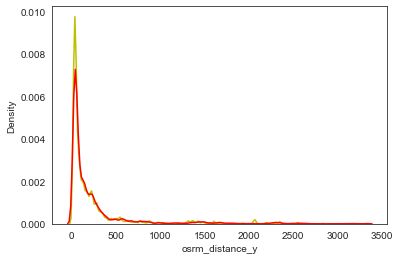

In [ ]:
### Comparing osrm_distance_y & segment_osrm_distance_y

x_df = condensed_df.groupby("trip_uuid")['osrm_distance_y'].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

y_df = condensed_df.groupby("trip_uuid")['segment_osrm_distance_y'].last()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

sns.kdeplot(x_df.osrm_distance_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.segment_osrm_distance_y,bw_adjust=0.3,color = "r")


<AxesSubplot:xlabel='osrm_distance_y', ylabel='Density'>

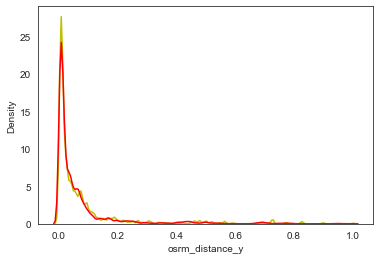

In [ ]:
#Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_df = scaler.fit_transform(x_df[["osrm_distance_y"]])
x_df = pd.DataFrame(x_df, columns=["osrm_distance_y"])

y_df = scaler.fit_transform(y_df[["segment_osrm_distance_y"]])
y_df = pd.DataFrame(y_df, columns=["segment_osrm_distance_y"])

sns.kdeplot(x_df.osrm_distance_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.segment_osrm_distance_y,bw_adjust=0.3,color = "r")

In [ ]:
# Hypothesis testing of Distance travelled to complete one whole trip
# H0 : actual_time = segment_osrm_distance
# H1 : actual_time != segment_osrm_distance

from scipy.stats import ttest_ind


T_statistic , p = ttest_ind(x_df.osrm_distance_y,y_df.segment_osrm_distance_y)

if p > 0.01 :
    print("H0 Null hypothesis rejected , there is significant difference between the two groups")
else :
    print("H1 failed to reject Null hypothesis , osrm_distance = segment_osrm_distance")
print("")
print("T_statistic : ",T_statistic, " & ", "P-value : ", p )

H1 failed to reject Null hypothesis , osrm_distance = segment_osrm_distance

T_statistic :  3.006606175860401  &  P-value :  0.002644578637034996


<AxesSubplot:xlabel='osrm_time_y', ylabel='Density'>

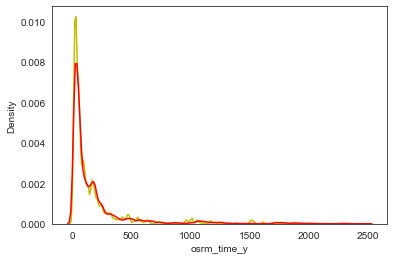

In [ ]:
### Comparing osrm_time_y & segment_osrm_time_y

x_df = condensed_df.groupby("trip_uuid")['osrm_time_y'].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

y_df = condensed_df.groupby("trip_uuid")['segment_osrm_time_y'].last()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

sns.kdeplot(x_df.osrm_time_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.segment_osrm_time_y,bw_adjust=0.3,color = "r")


<AxesSubplot:xlabel='osrm_time_y', ylabel='Density'>

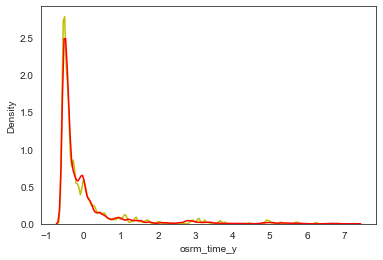

In [ ]:
#  Standardizing the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_df = scaler.fit_transform(x_df[["osrm_time_y"]])
x_df = pd.DataFrame(x_df, columns=["osrm_time_y"])

y_df = scaler.fit_transform(y_df[["segment_osrm_time_y"]])
y_df = pd.DataFrame(y_df, columns=["segment_osrm_time_y"])

sns.kdeplot(x_df.osrm_time_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.segment_osrm_time_y,bw_adjust=0.3,color = "r")

In [ ]:
# Hypothesis testing of Time taken to complete one whole trip
# H0 : osrm_time = segment_osrm_time
# H1 : osrm_time > segment_osrm_time

from scipy.stats import ttest_ind


T_statistic , p = ttest_ind(x_df.osrm_time_y,y_df.segment_osrm_time_y,alternative = "greater")

if p > 0.01 :
    print("H0 Null hypothesis rejected , there is significant difference between the two groups")
else :
    print("H1 failed to reject Null hypothesis , actual_time = segment_actual_time")
print("")
print("T_statistic : ",T_statistic, " & ", "P-value : ", p )

H0 Null hypothesis rejected , there is significant difference between the two groups

T_statistic :  2.6734785256818978e-15  &  P-value :  0.49999999999999895


                                                       INSIGHTS
The Given data has 144867 Rows and 24 Columns
The given data has two kinds of data that Training and test data
No of rows in  training data :  104858 , No of rows in  test data :  40009 , We can see that majority of the data is training data
Each Trip_uuid has more than one stops or relay points in its journey to reach from source to destination , hence group-by and Aggregate functions should be used careful i,e while grouping ["trip_uuid","source_name","destination_name"]  use “last()” as we have multiple sources and destinations for each trip and while grouping ("trip_uuid") use sum() , also while using the grouping of segmented values we can directly use sum() as each value is individual recording .
Columns Source-name and Destination-name have missing values with less than 0.2% , dropping off these rows as such minor percent of values may not affect the data.
After dividing Source-name and Destination-name into city, place , code , state , it is seen that the address format is not the same for all orders  and missing values can be found in place -1.5% , code-10% , state-10% , filling the null values with value of column city of the same respective rows
Column trip_creation_time can be divided into Trip_Year, Trip_Month, Trip_Day , from these we can infer that data is from year 2018, month september(9) but data from days 4 to 11 are not present in data .
Column start_scan_to_end_scan contains time taken to deliver from source to destination in Mins
 Using columns 'od_end_time','od_start_time' a new feature can be created Total time taken but checking the difference between 'od_end_time','od_start_time' .
Before grouping the data by trip_uuid Route type FTL comprises 67.95% and Carting comprises 32.05% of the total orders .
Top cities that have more number of Trips are Bangalore, Gurgaon, Kolkata, Hyderabad, Bhiwandi, Delhi.
FTL deliveries are mostly Inter-state and Carting are mostly Intra-state services.
After grouping the data by trip_uuid Route type FTL comprises 57.84% and Carting comprises 42.16% of the total orders .
 From the above difference between before and after grouping by trip_uuid we can infer that FTL type has more relay point although it is not making no other pickups or drop-offs along the way
Among the given data Training data comprises 72.49% and test data comprises 27.51%
Grouping data on trip_uuid  to perform Visual Analysis
Univariate Analysis :
The most number of trips are from source code “D” & “HB”
The most number of trips are to destination code “D” , “HB”,”H” & ”I”
The most number of trips are from source state “Karnataka” , “Maharashtra”, “Haryana”
The most number of trips are to Destination state “Karnataka” , “Maharashtra”, “Haryana”
We can see that there is a slight decline in number of trips at the end of month
Bivariate Analysis :
Although Karnataka has the highest number of trips from Source district still the majority of those trips come under non-dominant route-type i,e Carting , whereas Maharashtra has highest FTL type trips still which is dominated by Carting .
Insights that are observed in trips from source district resemble the insights observed in trips to destination district
Source codes D and HB are quiet opposite when it comes to dominance of FTL and carting, D has more number of FTL’s whereas HB has more number of Carting’s
In Destination codes D , HB are same as source codes and H , I codes have FTL in dominance
By comparing source code and destination code we can understand that these codes are again divided internally as sub-codes .
Multivariate Analysis :
Haryana doesn't have any outliers even though it has one of the highest number of trips  from source district
West Bengal took the highest number of minutes to complete the trip from source district by which we can also conclude West bengal also has the most number of far away destinations
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .
In Destination district West bengal doesn't have any outliers
Maharashtra took the highest number of minutes to complete the trip to destination district by which we can also conclude Maharashtra receives  from most number of far away source districts
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .
Source code HB has the highest number of minutes to complete the trip by which we can also conclude HB  also has the most number of far away destinations
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .
Destination code HB has the highest number of minutes to complete the trip by which we can also conclude HB  receives  from most number of far away source districts
Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .
From the scatter plot of osrm_time, osrm_distance (Aggregate values ) we can see the trend is linear as the distance increases time increases
Outliers are found in Columns actual_time_y, segment_actual_time_y, segment_osrm_distance_y, segment_osrm_time_y, start_scan_to_end_scan_y,  Total_timetaken_y.
NOTE : the letter “_y” after each Column name represents its Aggregated data .
Visual analysis of Total_timetaken & start_scan_to_end_scan shows that both the data are similar & Hypothesis test Result - H0 Null hypothesis rejected , there is significant difference between the two groups
Visual analysis of actual_time_y & osrm_time_y shows that both the data are similar & Hypothesis test Result - H1 failed to reject Null hypothesis , actual_time = osrm_time
Visual analysis of actual_time_y & segment_actual_time_y shows that both the data are similar & Hypothesis test Result - H0 Null hypothesis rejected , there is significant difference between the two groups.
Visual analysis of osrm_distance_y & segment_osrm_distance_y shows that both the data are similar & Hypothesis test Result - H1 failed to reject Null hypothesis , osrm_distance = segment_osrm_distance
Visual analysis of osrm_time_y & segment_osrm_time_y shows that both the data are similar & Hypothesis test Result - H0 Null hypothesis rejected , there is significant difference between the two groups



                                                    Recommendations
States and cities that have Higher traffic of Orders like Maharashtra, Karnataka ,Haryana also Bangalore , Hyderabad etc need to check and increase warehouse capacity and workers.
States and cities that have Lower traffic of Orders like Jummu & Kashmir, Uttarakhand etc , the company has to increase their exposure for their services by using difference means of advertising .
Delhivary mostly provides services in Bulk and B to B , so creating weight margin discounts can increase sales dramatically.
Reviewing the used OSRM can be beneficial as it failed to match the actual observations in some cases like  osrm_time & segment_osrm_time .

   
